# Classifiez automatiquement des biens de consommation

- **Projet 6 du parcours « Data Scientist » d’OpenClassrooms**
- **Kim Da rosa**



# Partie 1 : Texte

<!--TABLE OF CONTENTS-->

- [1. Compréhension du problème](#1.-Compréhension-du-problème)
  - [1.1 Mission](#1.1-Mission)
  - [1.2 Requirements :Bibliothèques utilisées dans ce notebook](#1.2-Requirements-:-Bibliothèques-utilisées-dans-ce-notebook)

- [2. Import et nettoyage des données](#2.-Import,-nettoyage-et-analyse-exploratoire-des-données)
  - [2.1 Import des données](#2.1-Import-des-données)
  - [2.2 Nettoyage des données](#2.2-Nettoyage-des-données)
- [3. Feature engineering / preprocessing](#3.-Feature-engineering-/-preprocessing)
  - [3.1 Préparation (preprocessing) des descriptions des données](<#3.2-Préparation-(preprocessing)-des-déscriptions-des-données>)
  - [3.2 Préparation des catégories](#3.1-Préparation-des-catégories)
  - [3.3 Verification des mots plus fréquents](#3.4-Verification-des-mots-plus-fréquents)
- [4. Fonctions communes pour modèles NLP](#4.-Fonctions-communs-pour-modèles-NLP)
  - [4.1 Lecture des données](#4.1-Lecture-des-données)
  - [4.2 Modélisation et évaluation des modèles:](#4.2-Modélisation-et-évaluation-des-modèles:)
  - [4.4 Visualisation des clusters après PCA](#4.4-Visualisation-des-clusters-sur-les-'reduced_dimensions')
- [5. Bag-of-Words et TF-IDF](#5.-Bag-of-Words-et-TF-IDF)
  - [5.1 Essaie 1 : Bag of words (BOW)](<#5.1-Essaie-1-:-Bag-of-words-(BOW)>)
  - [5.2 Essaie 2 : TF-IDF](#5.2-Essaie-2-:-TF-IDF)
  - [5.3 Essaie 3 :Word2Vec sur phrases lemmatizes](#7.1-Essaie-3-:-Word2Vec-sur-phrases-lemmatizes)
  - [Création de la matrice d'embedding](#Création-de-la-matrice-d'embedding)
  - [Création du modèle d'embedding](#Création-du-modèle-d'embedding)
  - [Exécution du modèle](#Exécution-du-modèle)
- [5.4. BERT](#5.4.-BERT)
  - [5.4.1 BERT - Fonctions communes](#5.4.1-BERT---Fonctions-communes)
  - [5.4.2 Essaie 4 : BERT HuggingFace](#5.4.2-Essaie-4-:-BERT-HuggingFace)
  - [5.4.3 Essaie 5 : BERT hub Tensorflow](#5.4.3-Essaie-5-:-BERT-hub-Tensorflow)
- [5.5. USE - Universal Sentence Encoder](#5.5.-USE---Universal-Sentence-Encoder)
  - [5.5.1 Essaie 6 : USE - Universal Sentence Encoder](#5.5.1.1-Essaie-6-:-USE---Universal-Sentence-Encoder)
- [6. Enregistrement des résultats](#6.-Enregistrement-des-résultats)


# Partie 2 : Image

<!--TABLE OF CONTENTS-->
- [2. Import et nettoyage des données](#2.-Import-et-nettoyage-des-données)
  - [2.1 Import des données textes pour récupérer les images](#2.1-Import-des-données-textes-pour-récuperer-les-images)

- [3. SIFT - (Scale-Invariant Feature Transform)](#3.-SIFT---(Scale-Invariant-Feature-Transform))
  - [3.1 Nettoyage (prétraitements) des données image](#3.1-Nettoyage-(prétraitements)-des-données-image)
  - [3.2 Création des clusters de descripteurs](#3.2-Création-des-clusters-de-descripteurs)
  - [3.3 Création des features des images](#3.3-Création-des-features-des-images)
  - [3.4 Réductions de dimension](#3.4-Réductions-de-dimension)
  - [3.5 KMeans :détermination de nombre de clusters des images](#3.5-KMeans-:-détermination-de-nombre-de-clusters-des-images)
  - [3.6 Analyse visuelle :affichage T-SNE selon catégories d'images](#3.6-Analyse-visuelle-:-affichage-T-SNE-selon-catégories-d'images)
  - [3.7 Analyse de la similarité entre catégories et clusters](#3.7-Analyse-du-similarité-entre-catégories-et-clusters)
- [4. ORB (Oriented FAST and Rotated BRIEF)](#4.-ORB-(Oriented-FAST-and-Rotated-BRIEF))
  - [4.1 Création des clusters de descripteurs](#4.1-Création-des-clusters-de-descripteurs)
  - [4.2 Création des features des images](#4.2-Création-des-features-des-images)
  - [4.3 Réductions de dimension](#4.3-Réductions-de-dimension)
  - [4.4 KMeans :détermination de nombre de clusters des images](#4.4-KMeans-:-détermination-de-nombre-de-clusters-des-images)
  - [4.5 Analyse visuelle :affichage T-SNE selon catégories d'images](#4.5-Analyse-visuelle-:-affichage-T-SNE-selon-catégories-d'images)
  - [4.6 Analyse de la similarité entre catégories et clusters](#4.6-Analyse-du-similarité-entre-catégories-et-clusters)
  - [4.7 Visualise les catégories trouvées par ORB](#4.7-Visualise-les-catégories-trouvés-par-ORB)
- [5. Classification d'images : Méthode d'apprentissage profond multimodal](#5.-Classification-d'images-:-Méthode-d'apprentissage-profond-multimodal)
  - [5.1 Image Preprocessing](#5.1-Image-Preprocessing)
  - [5.2 Text Preprocessing](#5.2-Text-Preprocessing)
  - [5.3 Image Embeddings](#5.3-Image-Embeddings)
  - [5.4 Implémenter Tour d'Image](#5.4-Implémenter-Tour-d'Image)
  - [5.5 Text Embeddings](#5.5-Text-Embeddings)
  - [5.6 Implémenter Tour de Texte](#5.6-Implémenter-Tour-de-Texte)
  - [5.7 Modèle Final](#5.7-Modèle-Final)
  - [5.8 Class Level Similarity](#5.8-Class-Level-Similarity)
  - [5.9 Prédictions](#5.9-Prédictions)
  - [5.10 Evaluation](#5.10-Evaluation)
- [6. Conclusion](#6.-Conclusion)
  - [6.1 Résumé des résultats](#6.1-Resumé-des-resultats)


#**PARTIE 1 : TEXTE**

# 1. Compréhension du problème

## 1.1 Mission

Etudier la faisabilité d'un **moteur de classification** des articles en différentes catégories,
avec un niveau de précision suffisant.

- **réaliser une première étude de faisabilité d'un moteur de classification**, d'articles, basé sur
  une image et une description, pour l'automatisation de l'attribution de la catégorie de l'article.

- **analyser le jeu de données** en **réalisant un prétraitement** des descriptions des produits et
  des images, une **réduction de dimension**, puis un **clustering**, à présenter sous la forme de
  graphiques en deux dimensions, et confirmés par un calcul de similarité entre les catégories
  réelles et les clusters.
- illustre que les caractéristiques extraites permettent de regrouper des produits de même
  catégorie.

- démontrer, par cette approche de modélisation, la faisabilité de regrouper automatiquement des
  produits de même catégorie


### 1.1.1 Interprétation
1. Etapes pour la classification du texte :

  - prétraitement des textes
  - extraction des _features_ (CountVectorizer, TF-IDF, BERT, USE)
  - création des _bag-of-features_
  - classification semi_supervisée 

2. Etapes pour la classification d'images :

  - prétraitement des images
  - extraction des _features_ (SIFT, ORB)
  - création des _bag-of-visual_features_
  - classification semi_supervisée (par CNN multi modal)


## 1.2 Bibliothèques utilisées dans ce notebook


**Utilisation de SIFT sur Google Colab**

- Utilise la commande `!pip install opencv-python==4.4.0.46` 
- test : `import cv2; print(cv2.__version__)`
- si la version > 4.4.0 : `cv2.SIFT_create()`


# 2.1 Préparation initiale dataset

## Récupération et nettoyage du dataset

In [ ]:
# Use SIFT with no error
!pip install opencv-python==4.4.0.46

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.5 MB 141 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras import layers, regularizers, optimizers
from keras.layers import Dense, Add, Flatten, Input, Activation, Embedding, Conv1D, GlobalMaxPooling1D, Dropout, Lambda, concatenate
from keras.models import Sequential, Model, load_model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.utils import shuffle
from sklearn.metrics.pairwise import cosine_similarity
import cv2
from numpy import load, save
import re
from wordcloud import WordCloud
import keras.backend as K
# col width
pd.set_option("max_colwidth", 240)
# option to be able see all columns
pd.set_option("max_columns", None)
# max lanes display
pd.options.display.max_rows = 30
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

path = '/content/drive/MyDrive/P6_DS/Dataset+projet+prétraitement+textes+images.zip (Unzipped Files)/Flipkart/' 
data_T0 = pd.read_csv(path + "flipkart_com-ecommerce_sample_1050.csv")
print(data_T0.shape)

(1050, 15)


In [ ]:
data_T0.head(5)

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [ ]:
data_T0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [ ]:
data_T0["description"].value_counts()

Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you 

In [ ]:
data_description = data_T0["description"]

print(data_description.count())
data_description.nunique()

1050


1050

### Données manquantes

Il y a peu de données manquantes (voir data_T0.info() non-null count):

- 1 prix non indiqué
- 25% des données n'ont pas de brand


#### Remplissage de données manquantes


In [ ]:
def fill_missing_values(df: pd.DataFrame):
    if 'brand' in df.columns:
        df = df.copy()
        df['brand'] = df['brand'].fillna('missing')
    return df


data_T0 = data_T0.pipe(fill_missing_values)


### Données dupliquées


In [ ]:
print(data_T0.duplicated(subset=['uniq_id']).sum())
print(data_T0.duplicated(subset=['pid']).sum())
print(data_T0.duplicated(subset=['product_name']).sum())


0
0
0


In [ ]:
for col in ['uniq_id', 'pid', 'product_name']:
    print(f'max_chars [{col}] = {data_T0[col].map(len).max()}')


max_chars [uniq_id] = 32
max_chars [pid] = 16
max_chars [product_name] = 151


On peut utiliser `pid` comme identifiant du produit, supprimant `uniq_id`
Le `product_name` est unique dans cet échantillon mais pas nécessairement dans la population.


# 3. Feature engineering / preprocessing

Les features à créer pour classifier les textes :

- préparation des **catégories** à partir du `product_category_tree`
- préparation des **descriptions nettoyées** pour entrer dans des modèles
- création des **topics** (sujets) basé sur ces descriptions nettoyées (pour comparer avec les catégories de `product_category_tree`)

## 3.1 Préparation (preprocessing) des descriptions des données

On essaie d'utiliser le champ `description` des produits pour les classifier.

Il faut préparer les descriptions avant de les fournir aux modèles de machine learning :

- mettre tout en minuscule
- retirer les mots de liaison
- retirer la ponctuation
- enlever les chiffres (si besoin)
- transformer les phrases en liste de tokens (en liste de mots)
- retirer mots de liaison ou qui n’apportant pas de sens (**stopwords**)
- lemmatizer

#### Références

- <https://inside-machinelearning.com/preprocessing-nlp-tutoriel-pour-nettoyer-rapidement-un-texte/>

### 3.1.1 Features à créer à partir du `description` :

Chaque modèle a des requisites différents :

- `sentence_bow` : descriptions en minuscule, sans mots inutiles, mais pas lemmatizés pour BOW (Bag-of-Words) et TF-IDF (term frequency-inverse document frequency)
  - On utilisera ces 'bag-of-words' pour les 'baseline' model
- `sentence_bow_lem` : traitement de `sentence_bow`, lemmatizés pour BOW, TF-IDF et Word2Vec
- `sentence_dl` : descriptions nettoyées


In [ ]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ').replace(".com"," ").replace('\d+', ' ').replace("rs.","")
    word_tokens = word_tokenize(sentence_clean)

    return word_tokens

# Stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')','rs','great','india','woman','discount','best','kit','faux','favorite','zora','fba','fbc','fcc','fdrbb','featuring','favourite','feel','feelin','feeling','feetz','feetje','bgn','acl','pla','wra']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if  w not in stop_w]
    #filtered_w = multiple_word_remove_func(list_words,stop_w)
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
# J'ai choisi la lemmatisation plutôt que le stemming car (même si ce n'est pas parfait) je la trouve plus pertinente à première vue :
# attention --> lem : attention / stem : attent
#        as --> lem : a / stem : as 
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text
nltk.download('omw-1.4')
# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

def multiple_word_remove_func(text, words_2_remove_list):
    '''
    Removes certain words from string, if present
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Removes the defined words from the created tokens
    
    Args:
        text (str): String to which the functions are to be applied, string
        words_2_remove_list (list): Words to be removed from the text, list of strings
    
    Returns:
        String with removed words
    '''     
    words_to_remove_list = words_2_remove_list
    
    #words = word_tokenize(text)
    text = ' '.join([word for word in text if word not in words_to_remove_list ] )
    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# 3.2 Création des catégories génerales

Regarder attentivement la base de données est toujours utile. L'attribut "product_category_tree" nous donne une catégorie pour tous les individus

In [ ]:
data_T0['product_category_tree'].value_counts()

["Home Furnishing >> Bed Linen >> Blankets, Quilts & Dohars"]                         56
["Kitchen & Dining >> Coffee Mugs >> Prithish Coffee Mugs"]                           26
["Watches >> Wrist Watches >> Maxima Wrist Watches"]                                  23
["Kitchen & Dining >> Coffee Mugs >> Rockmantra Coffee Mugs"]                         22
["Home Furnishing >> Bath Linen >> Towels"]                                           19
                                                                                      ..
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Infinity India Ethnic"]        1
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Ravishing Variety Ethnic"]     1
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Pg handicrafts Ethnic"]        1
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Homedesires Ethnic"]           1
["Watches >> Wrist Watches >> Petrol Wrist Watches"]                                   1
Name: product_categor

In [ ]:
data_T= data_T0.copy()
data_T['product_category_general']  = data_T['product_category_tree'].str.split('>>').str[0]
data_T['product_category_general']  = data_T['product_category_general'].apply(lambda x : transform_bow_lem_fct(x))


In [ ]:
data_T['product_category_final'] = np.where((data_T['product_category_general'].str.contains("luggage|watch")==True),
                                    'watches',
                           np.where((data_T['product_category_general'].str.contains("health|beauty|perfum")==True),
                                    'health_beauty',
                           np.where((data_T['product_category_general'].str.contains("toy|baby|diaper")==True),
                                     'toys_baby',
                           np.where((data_T['product_category_general'].str.contains("book|cd|dvd")==True),
                                     'books_cds_media',
                           np.where((data_T['product_category_general'].str.contains("grocer|food|drink")==True), 
                                     'groceries_food_drink',
                           np.where((data_T['product_category_general'].str.contains("phon|compu|tablet|electro|consol|usb|lapt")==True), 
                                     'technology',
                           np.where((data_T['product_category_general'].str.contains("furni|garden|bath|house|applianc|bed|blank")==True), 
                                                                                          'home_furnishing',
                           np.where((data_T['product_category_general'].str.contains("kitch")==True), 
                                                                                          'kitchen_furniture',
                           np.where((data_T['product_category_general'].str.contains("flow|gift|stuff")==True),
                                     'flowers_gifts',
                           np.where((data_T['product_category_general'].str.contains("decor")==True),
                                     'home_decoration',

                                     'other'))))))))))

In [ ]:
data_T['product_category_final'].value_counts()

home_furnishing      150
toys_baby            150
watches              150
home_decoration      150
kitchen_furniture    150
health_beauty        150
technology           150
Name: product_category_final, dtype: int64

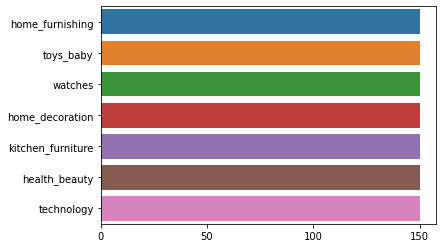

In [ ]:
sns.barplot(y = data_T['product_category_final'].value_counts().keys(),
            x = data_T['product_category_final'].value_counts().values);
plt.xticks(np.arange(0,151,50));

## 3.2.1 Mots fréquents dans les descriptions

Avant nettoyage des descriptions, on regarde les mots les plus utilisés

### 3.2.1.1 Par catégorie

In [ ]:
# from wordcloud import WordCloud
STOP_WORDS_EN = list(set(nltk.corpus.stopwords.words('english')))

def word_filter(list_words, stop_w=STOP_WORDS_EN):
    return [w for w in list_words if not w in stop_w]

tokenizer = nltk.RegexpTokenizer(r'[a-z]+')

def freq_words(sentences: pd.Series,
               token_fct=tokenizer.tokenize,
               filter_fct=word_filter,
               exclude=STOP_WORDS_EN,
               include=None,
               show_freq=True,
               normalize=True,
               nb=10) -> pd.DataFrame:
    """
    Comptage de la fréquence d'occurrences de chaque mot

    Parameters
    ----------
        sentences   series de phrases (ou mots) à compter les fréquences des mots
        token_fct   fonction pour diviser les phrases en tokens (mots)
        filter_fct  fonction pour filtrer les mots (avant le comptage)
        exclude     mots à exclure (après le comptage)
        include     mots à inclure dans le comptage
        show_freq   si vrai, retourner les fréquences/effectifs des mots, sinon retourner seulement les mots
        normalize   si vrai, retourner la fréquence (%), si faux, retourner l'effectif (count)
        nb          nombre de mots à retourner

    Returns
    ---------
        les mots plus fréquents, optionnellement avec leurs fréquences ou effectifs
    """

    corpus = sentences.str.lower().map(lambda x: token_fct(x))
    corpus = corpus.map(lambda x: filter_fct(x)).explode()

    # corpus = ' '.join(sentences)
    # corpus = nltk.word_tokenize(corpus)

    # exclure les stopwords standard - trop fréquent
    if not exclude is None:
        corpus = [w for w in corpus if not w in exclude]

    word_count = ((pd.Series(corpus)
                  .value_counts(normalize=normalize)
                   .to_frame('freq'))
                  .rename_axis('word')
                  .reset_index()
                  )

    if not include is None:
        # inclure seulement les mots sélectionnées
        # faire après value_counts pour fréquence en pourcentage
        word_count = word_count[word_count['word'].isin(include)]

    nb = min(nb, len(word_count))
    word_count = word_count.head(nb)

    if show_freq == False:
        # retourne seulement les top mots
        word_count = word_count.drop('freq', axis=1).T
    elif normalize:
        # retourne les top mots et fréquence (%)
        word_count['freq'] *= 100
    else:
        # retourne les top mots et effectif (comptage)
        word_count = word_count.rename(columns={'freq': 'count'})

    # retourne est transposé pour réduire l'espace d'affichage
    return word_count.T

def plot_wordcloud(sentences: pd.Series, cmap='nipy_spectral', ax=None, nb=20):
    cloud = WordCloud(stopwords=None, background_color=None,
                      colormap=cmap)
    topwords: pd.DataFrame = freq_words(sentences, nb=nb).T.set_index('word')
    topword_dict = dict(zip(list(topwords.index), list(topwords['freq'])))
    # print (topword_dict)
    cloud.generate_from_frequencies(topword_dict)
    if ax is None:
        plt.figure()
        ax = plt.gca()
    ax.imshow(cloud, interpolation="bilinear")
    plt.axis("off")


def plot_wordclouds_by_categ(df, feature='sentence_bow_lem', categ_col='product_category_final',
                             cmap='nipy_spectral', nb=10):
    categories = sorted(list(df[categ_col].unique()))
    colors = sns.color_palette(cmap, n_colors=len(categories)).as_hex()
    # print(colors)
    # print(categories)
    n_cols = 4
    n_rows = len(categories) // n_cols + (len(categories) % n_cols > 0)
    _ = plt.figure(figsize=(n_cols*4, n_rows*3))
    for n, category in enumerate(categories):
        ax = plt.subplot(n_rows, n_cols, n + 1)
        sentences = df[df[categ_col] == category][feature]
        color = sns.color_palette(f'light:{colors[n]}', as_cmap=True)
        plot_wordcloud(sentences, ax=ax, cmap=color, nb=nb)
        plt.title(category, fontweight='bold')

    plt.subplots_adjust(hspace=0, wspace=0.2)


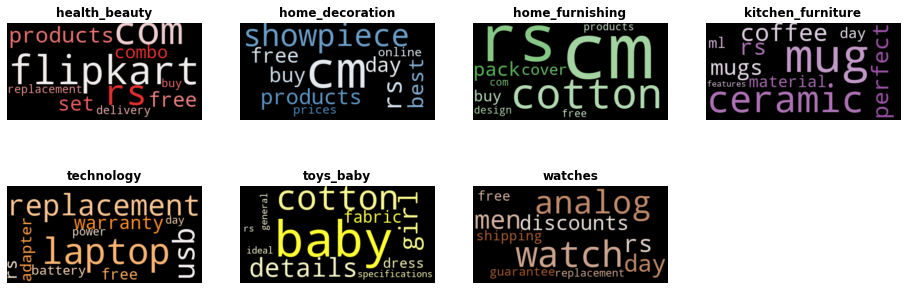

In [ ]:
plot_wordclouds_by_categ(data_T, feature='description',
                         categ_col='product_category_final', cmap='Set1')

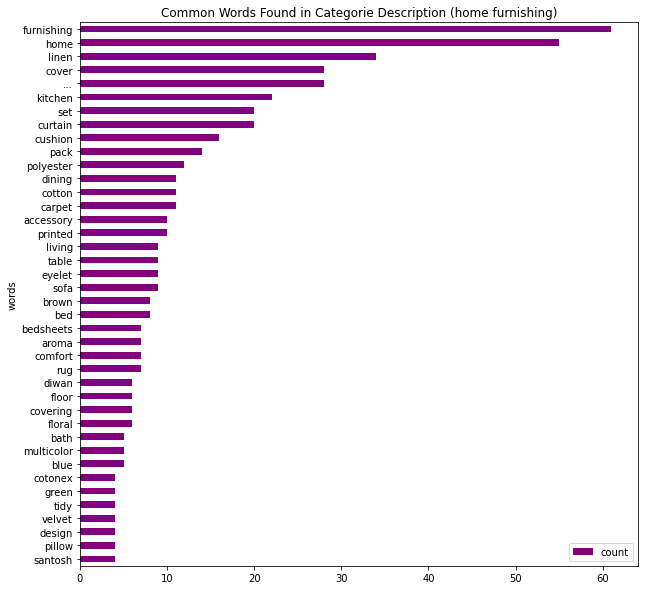

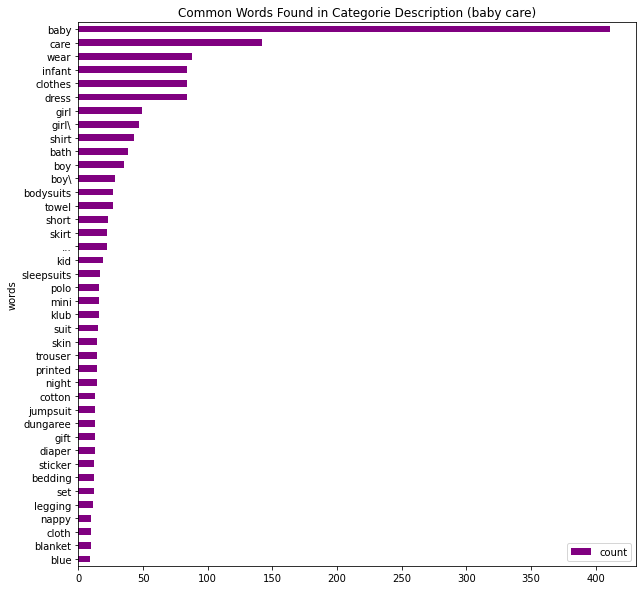

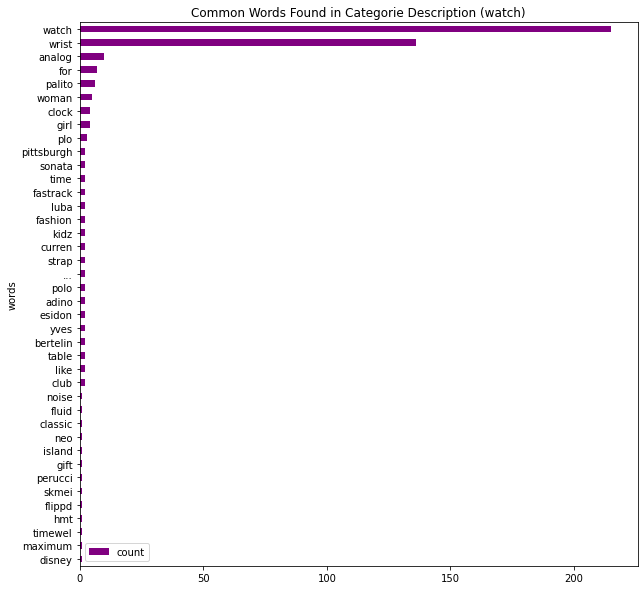

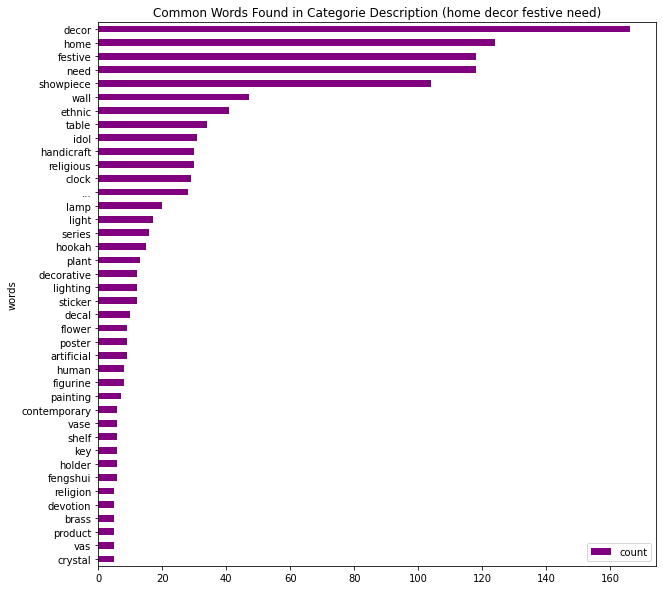

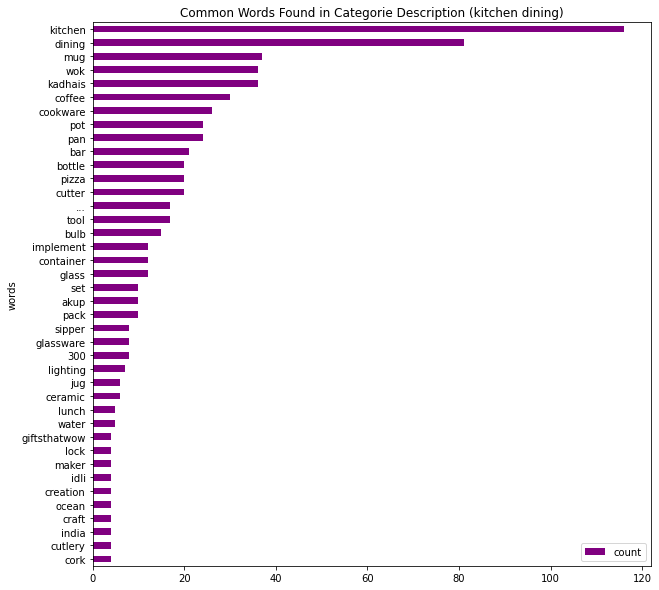

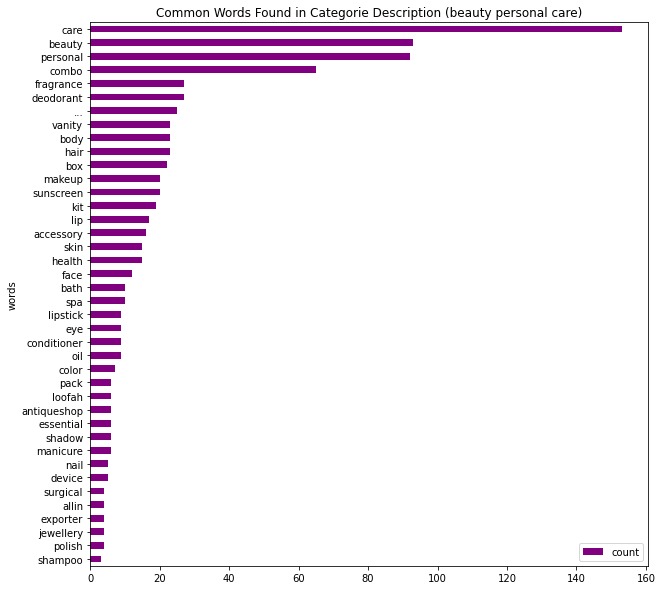

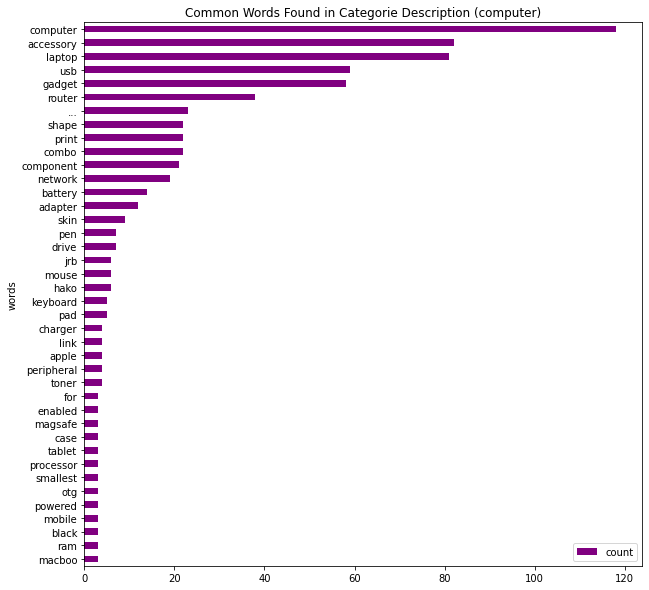

In [ ]:
import itertools
from collections import Counter
def most_frequent_words(description):

  for i in range(len(description)):
    description[i] = description[i].lower().split()

  all_words = list(itertools.chain(*description))
  word_counts = Counter(all_words)

  #creating a pandas dataframe of the 40 most common words in the dataset
  clean_description = pd.DataFrame(word_counts.most_common(40),
                                    columns=['words', 'count'])
  return clean_description
categ=""
c=0
for i in data_T['product_category_general'].unique():
  
  categ = i
  home_furnishing = data_T["product_category_tree"][data_T['product_category_general'] == categ].value_counts().index.str.split('>>')
  home_furnishing = pd.Series(home_furnishing)
  home_furnishing = home_furnishing.apply(lambda x : transform_bow_lem_fct(str(x)))
  description = home_furnishing
  most_common_description = most_frequent_words(description)
  c+=1
  fig, ax = plt.subplots(figsize=(10, 10))
  # plotting the bargraph in decreasing sorted order
  most_common_description.sort_values(by='count').plot.barh(x='words',
                                                            y='count',
                                                            ax=ax,
                                                            color="purple")

  ax.set_title(f"Common Words Found in Categorie Description ({categ})")
  plt.show()

### 3.2.1.2 En général

## Preprocessing  des descriptions


In [ ]:
# Preprocessing  des descriptions
data_T['sentence_bow'] = data_T0['description'].apply(lambda x : transform_bow_fct(x))
data_T['sentence_bow_lem'] = data_T0['description'].apply(lambda x : transform_bow_lem_fct(x))
data_T['sentence_dl'] = data_T0['description'].apply(lambda x : transform_dl_fct(x))
data_T.shape

(1050, 20)

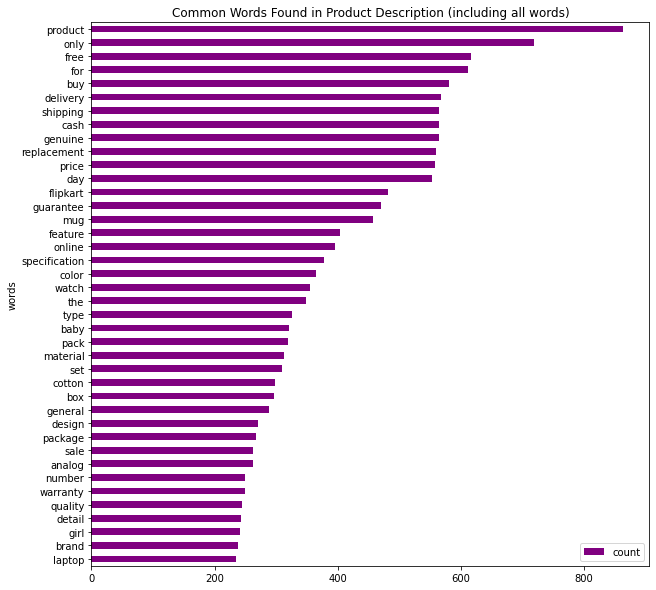

In [ ]:


description = data_T["sentence_bow_lem"].tolist()
most_common_description_all = most_frequent_words(description)

fig, ax = plt.subplots(figsize=(10, 10))
# plotting the bargraph in decreasing sorted order
most_common_description_all.sort_values(by='count').plot.barh(x='words',
                                                          y='count',
                                                          ax=ax,
                                                          color="purple")

ax.set_title("Common Words Found in Product Description (including all words)")
plt.show()

In [ ]:
def count_words(df, words, percent=1):
    # give me a list of words !!

    blub = len(words)
    categos = df["product_category_final"].unique()
    categas = np.insert(categos, 0, "Words", axis=0)
    categis = categas.tolist()
    datas = []

    for u in range(blub):
        word = words[u]

        crount = []
        crounts = []
        tott = 0
        crount.append(word)

        for i in range(len(categos)):
            coco = df[df["product_category_final"] == categos[i]]["sentence_bow_lem"]
            tott = 0
            for y in range(coco.shape[0]):
                tott += coco.iloc[y].count(word)
            crount.append(tott)
            crounts.append(tott)
        crount_tot = sum(crounts)

        if percent == 1:
            for i in range(len(crount) - 1):
                crount[i + 1] = round(crount[i + 1] * 100 / crount_tot, 3)
            datas.append(crount)
        else:
            datas.append(crount)

    df = pd.DataFrame(datas, columns=categis)

    return df
countword = count_words(data_T, most_common_description_all.words)

countword.head(10)

Words  home_furnishing  toys_baby  watches  home_decoration  \
0      product           10.805      7.126   15.632           15.632   
1         only           10.417      6.389   37.500           10.556   
2         free           11.854      6.839   20.365           12.614   
3          for           11.616     18.057   31.996            6.441   
4          buy           13.162      5.983   22.906           14.017   
5     delivery           13.051      5.996   23.633           13.580   
6      genuine           13.121      6.028   23.759           13.475   
7     shipping           13.121      6.028   23.759           13.475   
8         cash           13.121      6.028   23.759           13.475   
9  replacement            0.537      2.504   23.971           13.596   

   kitchen_furniture  health_beauty  technology  
0             14.943         18.046      17.816  
1              7.222         14.167      13.750  
2             14.590         16.717      17.021  
3             13.200          5.702      12.988  
4             10.256         17.265      16.410  
5              8.995         18.166      16.578  
6              9.043         17.908      16.667  
7              9.043         17.908      16.667  
8              9.043         17.908      16.667  
9              9.123         18.784      31.485

In [ ]:
# Ici je crée une sélection automatique pour ne garder les mots les plus fréquents
# qui représentent au moins Most Frequent Words % d'une catégorie (ie fréquents mais très représentatifs)
value_min=37
frot = []
for i in range(countword.shape[0]):
    if max(countword.drop("Words", axis=1).iloc[i]) < value_min:
        frot.append(i)

fro = countword.iloc[frot]
stopwords = fro["Words"].tolist()
print("the number of calculated stopwords is :", len(fro))

the number of calculated stopwords is : 28


In [ ]:
# Sélection supervisée des stop words
stop_words_list_most = most_common_description_all.words[most_common_description_all.words.isin(["mug","baby","design","color","set","cotton","box","girl","watch"]) == False].tolist()

In [ ]:
stops =stopwords+stop_words_list_most + stop_w + data_T['brand'].str.lower().unique().tolist()

In [ ]:
data_T['sentence_bow_lem'] = data_T['sentence_bow_lem'].str.split(" ").apply(lambda x : multiple_word_remove_func(x,stops+ ["made","yes","also",'...'])).values


In [ ]:
#defining the function to remove alphanum (pla200, rs122, etc ...)
def remove_alnum(text):
    alnumfree=" ".join([i for i in text if   i.isalnum()])
    #alnumfree = text.str.findall(r'((?<=\s)[a-zA-Z,]+(?=\s|$))').agg(' '.join)
    return alnumfree
data_T['sentence_bow_lem'] = data_T['sentence_bow_lem'].str.split(" ").apply(lambda x:remove_alnum(x))


In [ ]:
#data_T['sentence_bow_lem'] = data_T['sentence_bow_lem'].str.findall(r'((?<=\s)[a-zA-Z,]+(?=\s|$))').agg(' '.join)

In [ ]:
#Drop numbers
data_T['sentence_bow_lem'] = data_T['sentence_bow_lem'].str.replace('\d+', '')
"""
#Drop duplicates words
data_T["sentence_bow_lem"] = [' '.join(dict.fromkeys(x.split())) for x in data_T.sentence_bow_lem ]"""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


'\n#Drop duplicates words\ndata_T["sentence_bow_lem"] = [\' \'.join(dict.fromkeys(x.split())) for x in data_T.sentence_bow_lem ]'

## 3.2.1.3 Mots les plus fréquents après nettoyage

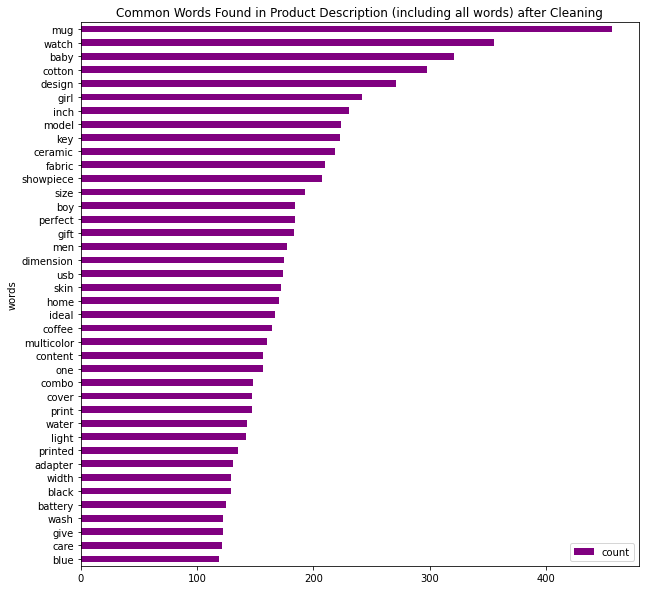

In [ ]:


description = data_T["sentence_bow_lem"].tolist()
most_common_d = most_frequent_words(description)

fig, ax = plt.subplots(figsize=(10, 10))
# plotting the bargraph in decreasing sorted order
most_common_d.sort_values(by='count').plot.barh(x='words',
                                                          y='count',
                                                          ax=ax,
                                                          color="purple")

ax.set_title("Common Words Found in Product Description (including all words) after Cleaning")
plt.show()

#### 3.2.1.4 Visualiser avec un word clouds


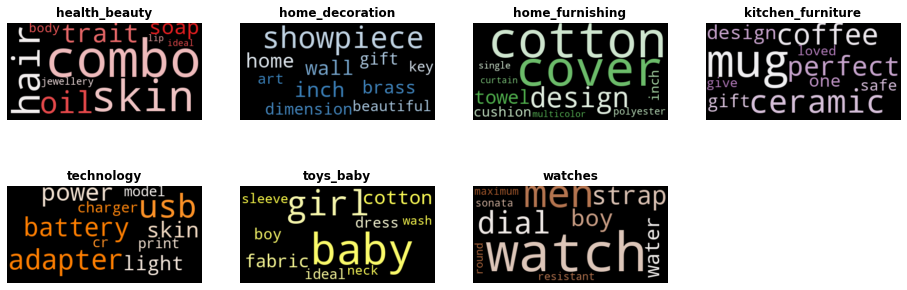

In [ ]:
plot_wordclouds_by_categ(data_T, feature='sentence_bow_lem',
                         categ_col='product_category_final', cmap='Set1')


Nombre de vocabulaire unique

In [ ]:
len(set(str(list(data_T['sentence_bow_lem'].values.flatten())).split(' ')))

4876

In [ ]:
data_T.to_csv("data_text_preproc2.csv")

# Préparation commune des traitements

## 4. Modélisation et évaluation des modèles :

- **Prétraitement** des données (choix de description, lemmatization, stopwords,...) - voir ci-dessus. On utilise 'feature' pour choisir la colonne des données prétraitées.

- **Extraction de features** (par Bag-of-Words, TF-IDF, Word2Vec etc)
  - Unigram, Bigram et Trigram

- **Réduction de dimensions** (par t-SNE, PCA, ...)

- **Classification (clustering) semi supervisée sur les dimensions réduites** 

  - par Kmeans (défaut)


- **Evaluation de correspondance avec les catégories définies**
  - ARI score
  - visualisation pour comparer les clusters sur les principaux dimensions réduits (TSNE ou PCA par exemple)



In [ ]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import time
from sklearn.cluster import KMeans , MiniBatchKMeans

from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere


## Lecture dataset

In [ ]:
print(data_T.shape)

(1050, 20)


In [ ]:
l_cat = list(set(data_T['product_category_final']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(data_T.iloc[i]['product_category_final'])) for i in range(len(data_T))]

catégories :  ['toys_baby', 'home_furnishing', 'technology', 'home_decoration', 'kitchen_furniture', 'health_beauty', 'watches']


In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

data_T['length_bow'] = data_T['sentence_bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", data_T['length_bow'].max())
data_T['length_dl'] = data_T['sentence_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", data_T['length_dl'].max())


max length bow :  379
max length dl :  632


## Fonctions communes pour le NLP

In [ ]:
import time

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des descriptions par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des descriptions par clusters')
    
    plt.show()
    print("ARI : ", ARI)


# Bag of word - Tf-idf

TF = Term Frequency / IDF = Inverse Document Frequency (indicateur de similarité)

Le poids du n-gram est alors : fréquence du n-gram * idf(n-gramm)

On veut trouver des mots caractéristiques de chaque groupe

## Préparation sentences

In [ ]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'sentence_bow_lem'
cv_fit = cvect.fit(data_T[feat])
ctf_fit = ctf.fit(data_T[feat])

cv_transform = cvect.transform(data_T[feat])  
ctf_transform = ctf.transform(data_T[feat])  

In [ ]:
# Unigram 

# CountVectorizer
count_vect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1,analyzer="word")
X_counts = count_vect.fit_transform(data_T[feat])
print(X_counts.shape)

# TF_IDF
tfidf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)
X_tfidf = tfidf.fit_transform(data_T[feat])
print(X_tfidf.shape)
feature_names_tf = tfidf.get_feature_names()
dense = X_tfidf.todense()  # convert sparse matrix to numpy array
denselist = dense.tolist()  # convert array to list
df_tf = pd.DataFrame(denselist, columns=feature_names_tf)  # convert to dataframe

# Bigram

# CountVectorizer
count_vect2 = CountVectorizer(stop_words='english', max_df=0.95, min_df=1,analyzer="word", ngram_range=(2, 2), max_features=3000)
X_counts2 = count_vect2.fit_transform(data_T[feat])
print(X_counts2.shape)


# TF_IDF
tfidf2 = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1,analyzer="word", ngram_range=(2, 2), max_features=3000)
X_tfidf2 = tfidf2.fit_transform(data_T[feat])
print(X_tfidf2.shape)
feature_names_tf2 = tfidf2.get_feature_names()
dense2 = X_tfidf2.todense()  # convert sparse matrix to numpy array
denselist2 = dense2.tolist()  # convert array to list
df_tf2 = pd.DataFrame(denselist2, columns=feature_names_tf2)  # convert to dataframe

# Trigram

# CountVectorizer
count_vect3 = CountVectorizer(analyzer="word", ngram_range=(3, 3), max_features=3000,stop_words='english', max_df=0.95, min_df=1)
X_counts3 = count_vect3.fit_transform(data_T[feat])
print(X_counts3.shape)

# TF_IDF
tfidf3 = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1,analyzer="word", ngram_range=(3, 3), max_features=3000)
X_tfidf3 = tfidf3.fit_transform(data_T[feat])
print(X_tfidf3.shape)
feature_names_tf3 = tfidf3.get_feature_names()
dense3 = X_tfidf3.todense()  # convert sparse matrix to numpy array (aka dense matrix).
denselist3 = dense3.tolist()  # convert array to list
df_tf3 = pd.DataFrame(denselist3, columns=feature_names_tf3)  # convert to dataframe

(1050, 4700)
(1050, 4700)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(1050, 3000)
(1050, 3000)
(1050, 3000)
(1050, 3000)


la matrice `cv_transform` représente le bag-of-words crée par CountVectorizer:


In [ ]:

def show_example_bow(feature= "sentence_bow_lem"):
    print(data_T[feature][40])
    print(data_T[feature][42])
    print(data_T[feature][43])

    df_bow = pd.DataFrame.sparse.from_spmatrix(
        cv_transform,
        columns=cvect.get_feature_names_out(),
        index=data_T.index)
    df_bow = df_bow.join(data_T[['product_name']])
    print('Portion du bag-of-words - vectors')
    return df_bow.loc[40:43, ['boy', 'baby', 'girl', 'grey', 'blue', 'pyjama', 'cotton', 'hair', 'product_name']]


show_example_bow()

key mom kid baby girl printed green top pyjama fabric cotton green mom kid baby girl printed green top pyjama 309 girl pyjama mom kid baby girl printed green top pyjama pattern printed ideal baby girl night suit fabric cotton top pyjama neck round neck top pyjama
key mom kid baby girl printed blue grey top pyjama fabric cotton blue grey mom kid baby girl printed blue grey top pyjama 309 girl pyjamaset mom kid baby girl printed blue grey top pyjama pattern printed ideal baby girl night suit content fabric cotton top pyjama neck round nack top pyjama
key burt bee hair repair shea grapefruit conditioner ideal boy girl applied conditioning hair condition damaged hair hair dry hair burt bee hair repair shea grapefruit conditioner conditioner trait hair condition damaged hair hair dry hair applied conditioning ideal boy girl trait burt bee quantity model name hair repair shea grapefruit conditioner conditioner
Portion du bag-of-words - vectors


boy  baby  girl  grey  blue  pyjama  cotton  hair  \
40    0     4     5     0     0       6       2     0   
41    0     0     0     2     0       0       1     0   
42    0     4     5     4     4       5       2     0   
43    2     0     2     0     0       0       0    11   

                                                    product_name  
40        Mom and Kid Baby Girl's Printed Green Top & Pyjama Set  
41                                Kripa's Printed Cushions Cover  
42   Mom and Kid Baby Girl's Printed Blue, Grey Top & Pyjama Set  
43  Burt s Bees Hair Repair Shea And Grapefruit Deep Conditioner

La matrice `ctf_transform` représente les vecteurs TF-IDF crée par TfidfVectorizer :


In [ ]:
df_tf = pd.DataFrame.sparse.from_spmatrix(
    ctf_transform,
    columns=ctf.get_feature_names_out(),
    index=data_T.index).join(data_T['product_name'])


show_example_bow()

df_tf.loc[40:45, ['baby', 'girl', 'grey', 'blue', 'pyjama',
                  'cotton', 'hair', 'product_name']]


key mom kid baby girl printed green top pyjama fabric cotton green mom kid baby girl printed green top pyjama 309 girl pyjama mom kid baby girl printed green top pyjama pattern printed ideal baby girl night suit fabric cotton top pyjama neck round neck top pyjama
key mom kid baby girl printed blue grey top pyjama fabric cotton blue grey mom kid baby girl printed blue grey top pyjama 309 girl pyjamaset mom kid baby girl printed blue grey top pyjama pattern printed ideal baby girl night suit content fabric cotton top pyjama neck round nack top pyjama
key burt bee hair repair shea grapefruit conditioner ideal boy girl applied conditioning hair condition damaged hair hair dry hair burt bee hair repair shea grapefruit conditioner conditioner trait hair condition damaged hair hair dry hair applied conditioning ideal boy girl trait burt bee quantity model name hair repair shea grapefruit conditioner conditioner
Portion du bag-of-words - vectors


baby      girl      grey      blue    pyjama    cotton      hair  \
40  0.245159  0.308309  0.000000  0.000000  0.642875  0.112930  0.000000   
41  0.000000  0.000000  0.278950  0.000000  0.000000  0.085265  0.000000   
42  0.243588  0.306334  0.367089  0.277492  0.532297  0.112206  0.000000   
43  0.000000  0.080130  0.000000  0.000000  0.000000  0.000000  0.683903   
44  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
45  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                                                    product_name  
40        Mom and Kid Baby Girl's Printed Green Top & Pyjama Set  
41                                Kripa's Printed Cushions Cover  
42   Mom and Kid Baby Girl's Printed Blue, Grey Top & Pyjama Set  
43  Burt s Bees Hair Repair Shea And Grapefruit Deep Conditioner  
44                                AKUP i-loves-music Ceramic Mug  
45                                AKUP i-love-my-mom Ceramic Mug

## Exécution des modèles

CountVectorizer Unigram: 
-----------------
ARI :  0.441 time :  28.0

Visualisation des Clusters


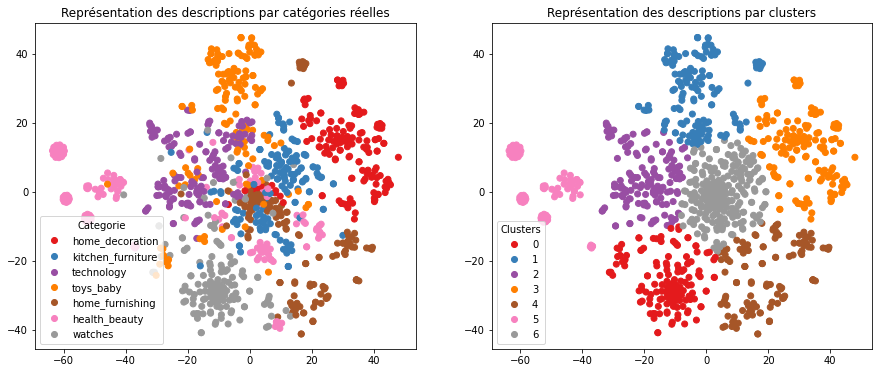

ARI :  0.441

CountVectorizer Bigram: 
-----------------
ARI :  0.152 time :  20.0

Visualisation des Clusters


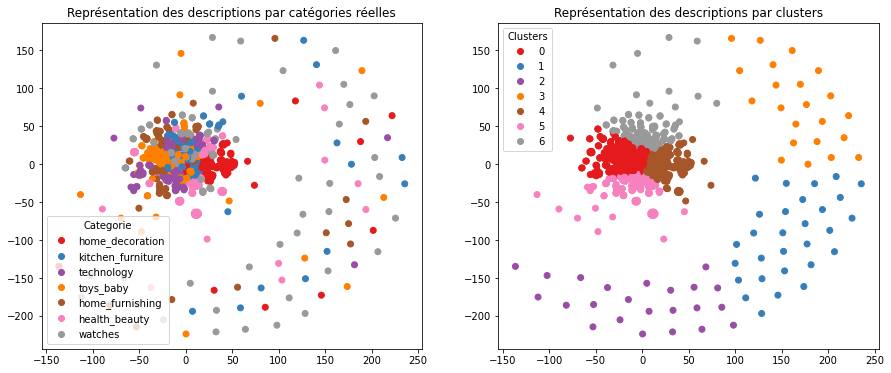

ARI :  0.152

CountVectorizer Trigram: 
-----------------
ARI :  0.0076 time :  20.0

Visualisation des Clusters


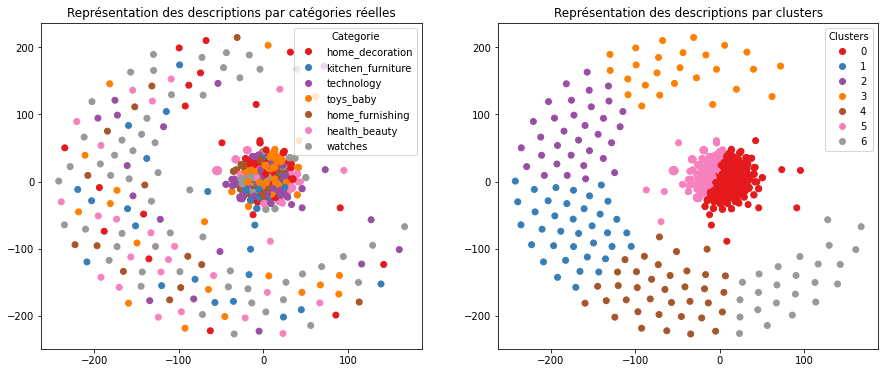

ARI :  0.0076



In [ ]:
algo2 = {"Unigram" : ctf_transform, "Bigram" : X_tfidf2, "Trigram" : X_tfidf3}
algo = {"Unigram" : cv_transform, "Bigram" : X_counts2, "Trigram" : X_counts3}

for keys, values in algo.items() :
    print(f"CountVectorizer {keys}: ")
    print("-----------------")
    ARI, X_tsne, labels = ARI_fct(values)
    print()
    print("Visualisation des Clusters")
    TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) 
    print()

Tf-idf : Unigram
--------
ARI :  0.4633 time :  15.0

Visualisation des Clusters


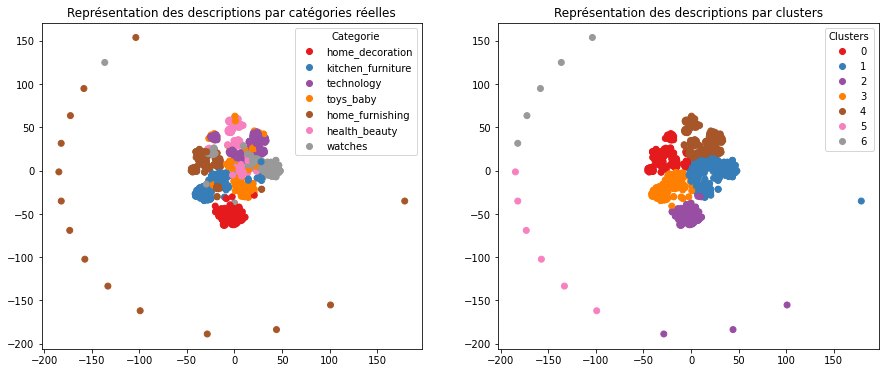

ARI :  0.4633

Tf-idf : Bigram
--------
ARI :  0.0084 time :  20.0

Visualisation des Clusters


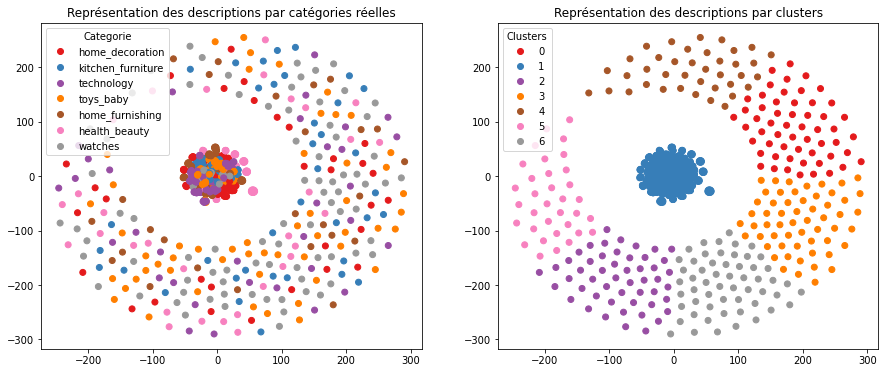

ARI :  0.0084

Tf-idf : Trigram
--------
ARI :  0.0088 time :  20.0

Visualisation des Clusters


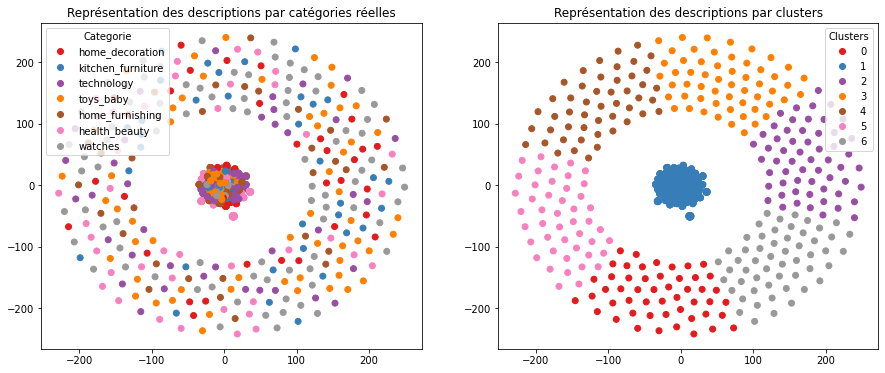

ARI :  0.0088



In [ ]:
for keys, values in algo2.items() :
    print(f"Tf-idf : {keys}")
    print("--------")
    ARI, X_tsne, labels = ARI_fct(values)
    print()
    print("Visualisation des Clusters")
    TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) 
    print()

Les Unigrams obtiennent le meilleur score et le meilleur algo est le TF-IDF avec un score ARI de 0.55

### Comparer les topics crées par les modèles avec les vrais topics

In [ ]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(ctf_transform.todense()).groupby(labels).mean() # groups the TF-IDF vector by cluster
    terms = ctf.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
# Unigram        
get_top_keywords(10)


Cluster 0
power,adapter,bulb,wireless,router,led,light,cell,battery,usb

Cluster 1
abstract,inch,multicolor,comforter,quilt,cushion,cover,double,single,blanket

Cluster 2
digital,round,water,sonata,resistant,boy,strap,dial,men,watch

Cluster 3
ideal,neck,sleeve,boy,sticker,dress,cotton,fabric,girl,baby

Cluster 4
idol,lord,statue,decorative,gift,handicraft,ganesha,brass,kadhai,showpiece

Cluster 5
shape,cotton,soap,jewellery,hair,skin,bath,towel,combo,set

Cluster 6
rockmantra,microwave,safe,design,loved,gift,perfect,coffee,ceramic,mug


# CountVectorizer & TF_IDF Avec PCA

`PCA(n_components=0.95)` - conduire PCA et retenir seulement les composants qui explique 95% de la variance

- on élimine les mots qui sont rares ou très associés entre eux.

In [ ]:
#### To solve the error : PCA does not support sparse input (most elements are 0)
count_uni = X_counts.toarray()
count_bi = X_counts2.toarray()
count_tri = X_counts3.toarray()

ngrams = [count_uni, count_bi, count_tri]

In [ ]:
n_compo = [count_uni.shape[0], count_bi.shape[0], count_tri.shape[0]]

pcas = []
pcas_fit = []
X_trans = []

for i in range(len(ngrams)):
    pcas.append(decomposition.PCA(n_components=n_compo[i]))
    pcas_fit.append(pcas[i].fit(ngrams[i]))
    print(pcas[i].explained_variance_ratio_.cumsum())
    X_trans.append(pcas[i].transform(ngrams[i]))

[0.06716161 0.10805245 0.14514765 ... 1.         1.         1.        ]
[0.05890295 0.11065953 0.15476302 ... 1.         1.         1.        ]
[0.07959876 0.15180593 0.20408938 ... 1.         1.         1.        ]


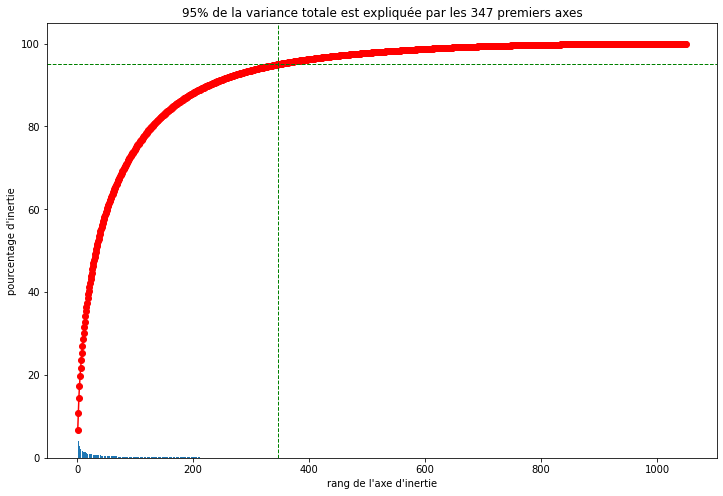

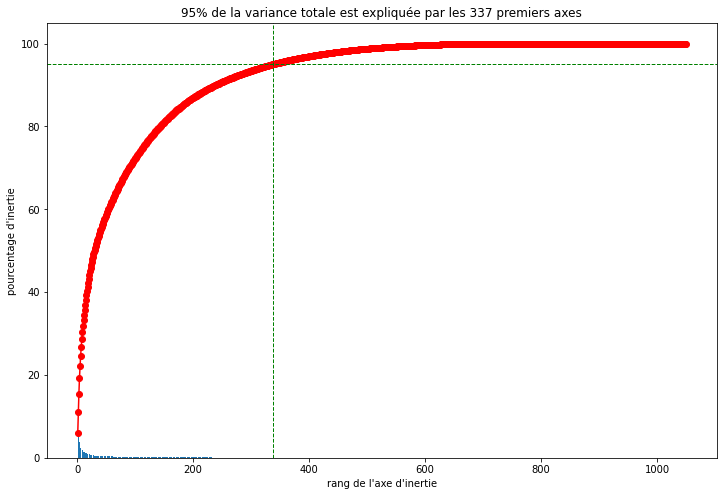

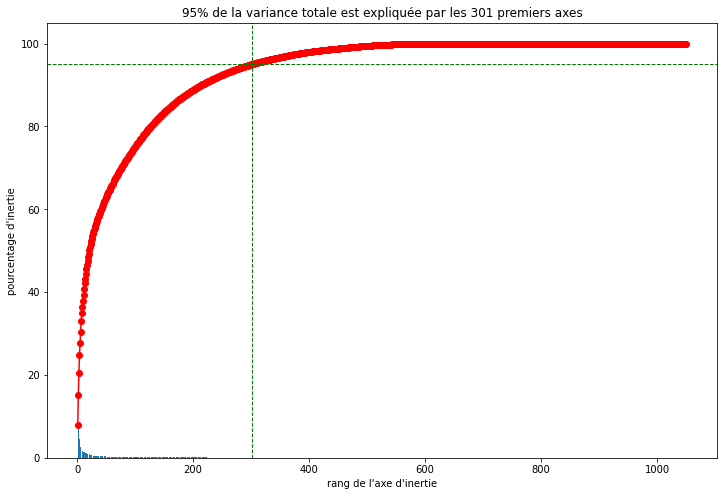

In [ ]:
min_plans_list = []
for i in range(len(ngrams)):
  # Explained variance
  varexpl = pcas[i].explained_variance_ratio_*100

  # Plot of cumulated variance
  plt.figure(figsize=(12,8))
  plt.bar(np.arange(len(varexpl))+1, varexpl)

  cumSumVar = varexpl.cumsum()
  plt.plot(np.arange(len(varexpl))+1, cumSumVar,c="red",marker='o')
  plt.axhline(y=95, linestyle="--", 
              color="green",
              linewidth=1)

  limit = 95
  valid_idx = np.where(cumSumVar >= limit)[0]
  min_plans = valid_idx[cumSumVar[valid_idx].argmin()]+1
  plt.axvline(x=min_plans, linestyle="--", 
              color="green",
              linewidth=1)
  min_plans_list.append(min_plans)
  plt.xlabel("rang de l'axe d'inertie")
  #plt.xticks(np.arange(len(varexpl))+1)
  plt.ylabel("pourcentage d'inertie")
  plt.title("{}% de la variance totale est expliquée"\
            " par les {} premiers axes".format(limit,
                                              min_plans))
  plt.show(block=False)

# TF_IDF PCA

In [ ]:

ngrams_tf = [dense, dense2, dense3]
n_compo_tf = [dense.shape[0], dense2.shape[0], dense3.shape[0]]

tfs = []
tfs_fit = []
X_trans_tf = []

for i in range(len(ngrams_tf)):
    tfs.append(decomposition.PCA(n_components=n_compo_tf[i]))
    tfs_fit.append(tfs[i].fit(ngrams_tf[i]))
    print(tfs[i].explained_variance_ratio_.cumsum())
    X_trans_tf.append(tfs[i].transform(ngrams_tf[i]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[0.02557756 0.04363889 0.05815706 ... 1.         1.         1.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[0.02222555 0.04191129 0.05517477 ... 1.         1.         1.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[0.02681863 0.04227184 0.05631502 ... 1.         1.         1.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


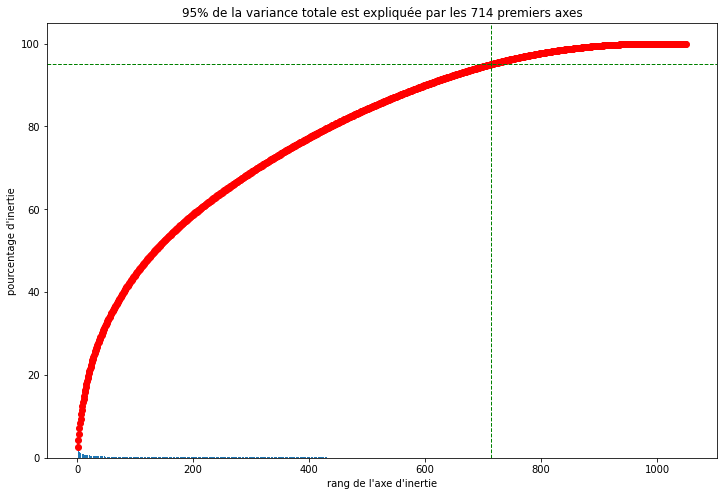

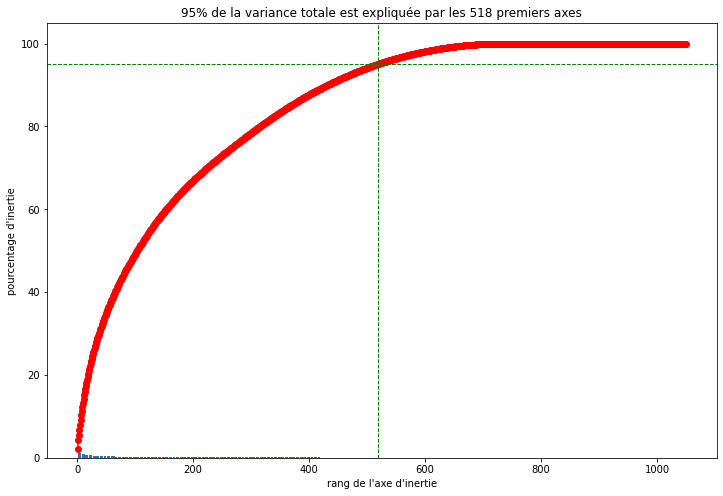

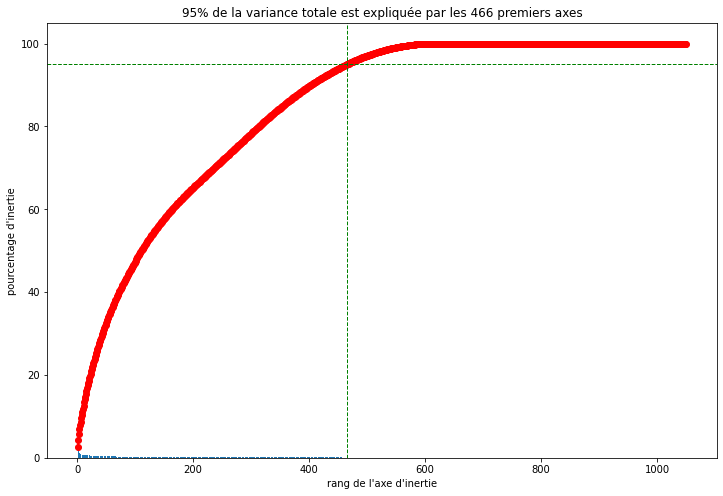

In [ ]:
min_plans_list_tf = []
for i in range(len(ngrams)):
  # Explained variance
  varexpl = tfs[i].explained_variance_ratio_*100

  # Plot of cumulated variance
  plt.figure(figsize=(12,8))
  plt.bar(np.arange(len(varexpl))+1, varexpl)

  cumSumVar = varexpl.cumsum()
  plt.plot(np.arange(len(varexpl))+1, cumSumVar,c="red",marker='o')
  plt.axhline(y=95, linestyle="--", 
              color="green",
              linewidth=1)

  limit = 95
  valid_idx = np.where(cumSumVar >= limit)[0]
  min_plans = valid_idx[cumSumVar[valid_idx].argmin()]+1
  plt.axvline(x=min_plans, linestyle="--", 
              color="green",
              linewidth=1)
  min_plans_list_tf.append(min_plans)
  plt.xlabel("rang de l'axe d'inertie")
  #plt.xticks(np.arange(len(varexpl))+1)
  plt.ylabel("pourcentage d'inertie")
  plt.title("{}% de la variance totale est expliquée"\
            " par les {} premiers axes".format(limit,
                                              min_plans))
  plt.show(block=False)

CountVectorizer PCA Unigram: 
-----------------
ARI :  0.4577 time :  17.0

Visualisation des Clusters


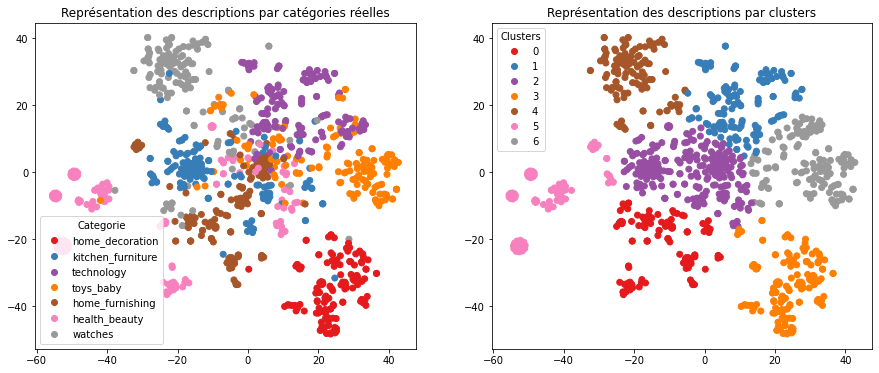

ARI :  0.4577

Tf-idf PCA : Unigram 
--------
ARI :  0.5568 time :  18.0

Visualisation des Clusters


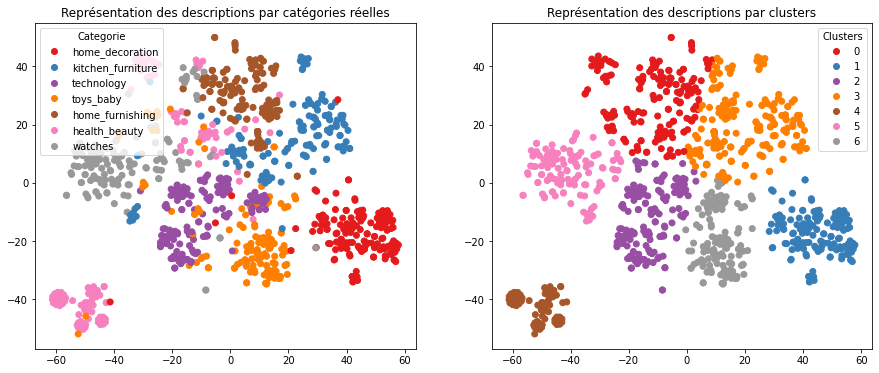

ARI :  0.5568

--------
CountVectorizer PCA Bigram: 
-----------------
ARI :  0.2164 time :  19.0

Visualisation des Clusters


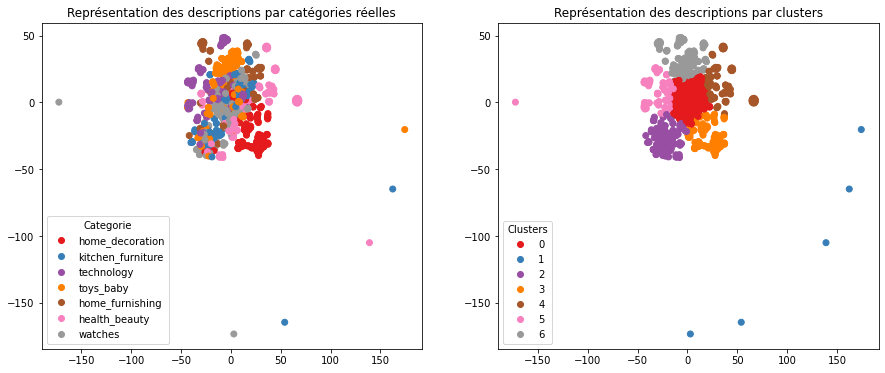

ARI :  0.2164

Tf-idf PCA : Bigram 
--------
ARI :  0.056 time :  20.0

Visualisation des Clusters


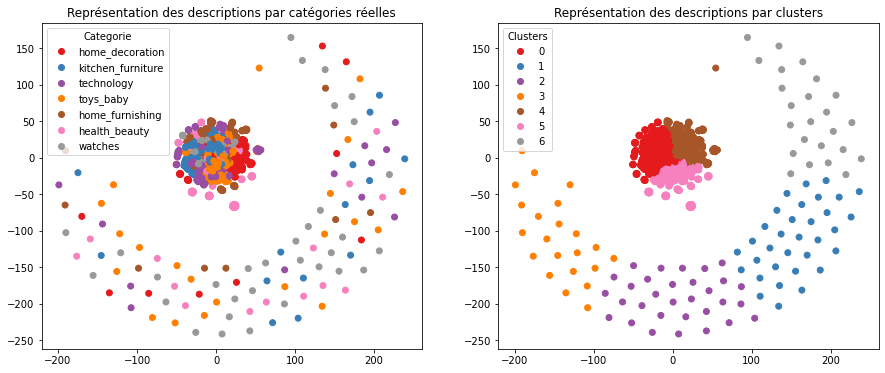

ARI :  0.056

--------
CountVectorizer PCA Trigram: 
-----------------
ARI :  0.0487 time :  18.0

Visualisation des Clusters


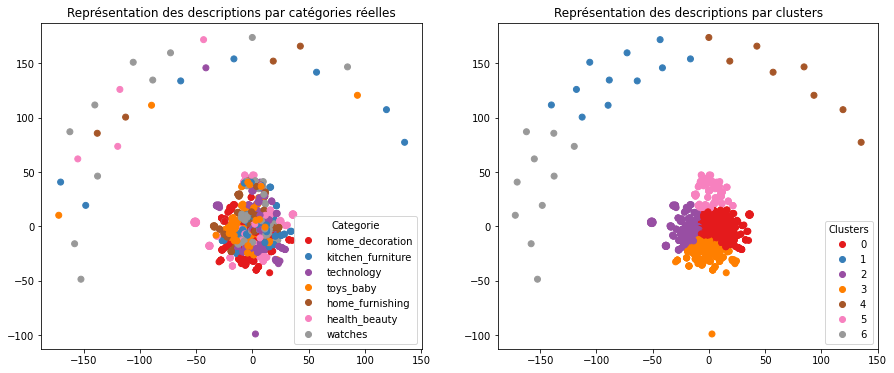

ARI :  0.0487

Tf-idf PCA : Trigram 
--------
ARI :  0.0244 time :  27.0

Visualisation des Clusters


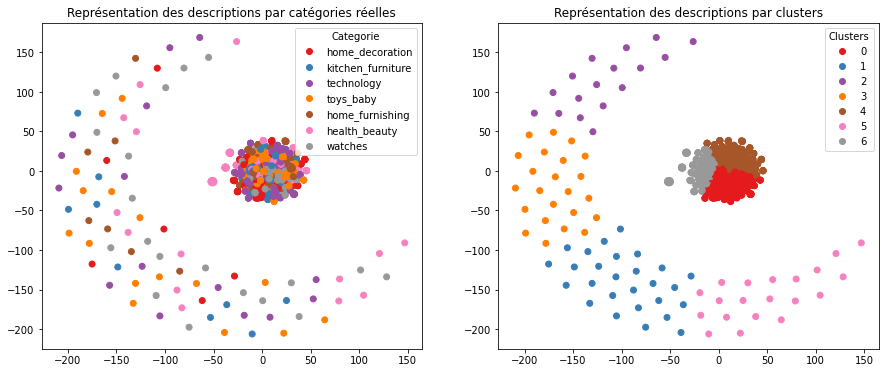

ARI :  0.0244

--------


In [ ]:
grams= {0 : "Unigram", 1 : "Bigram", 2 : "Trigram"}
for keys, values in grams.items():
  print(f"CountVectorizer PCA {values}: ")
  print("-----------------")
  ARI, X_tsne, labels = ARI_fct(X_trans[keys][:,:min_plans_list[keys]-1])
  print()
  print("Visualisation des Clusters")
  TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) 
  print()
  print(f"Tf-idf PCA : {values} ")
  print("--------")
  ARI, X_tsne, labels = ARI_fct(X_trans_tf[keys][:,:min_plans_list_tf[keys]-1])
  print()
  print("Visualisation des Clusters")
  TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) 
  print()
  print("--------")

Les Unigrams obtiennent le meilleur score et le meilleur algo est le TF-IDF avec un score ARI de 0.55

# Word2Vec

In [ ]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

## Création du modèle Word2Vec

In [ ]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = data_T['sentence_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [ ]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv 
w2v_words = model_vectors.vocab
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4247
Word2Vec trained


In [ ]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4248


## Représentation des tops mots par cluster

In [ ]:
X = w2v_model.wv.get_normed_vectors()

reducer t-SNE, input shape=(70, 300)
reducer t-SNE, shape =(70, 2) time : 1.0
ARI :  -1 time :  1.0
-1
"Representation_des_top_mots_par_cluster.png"


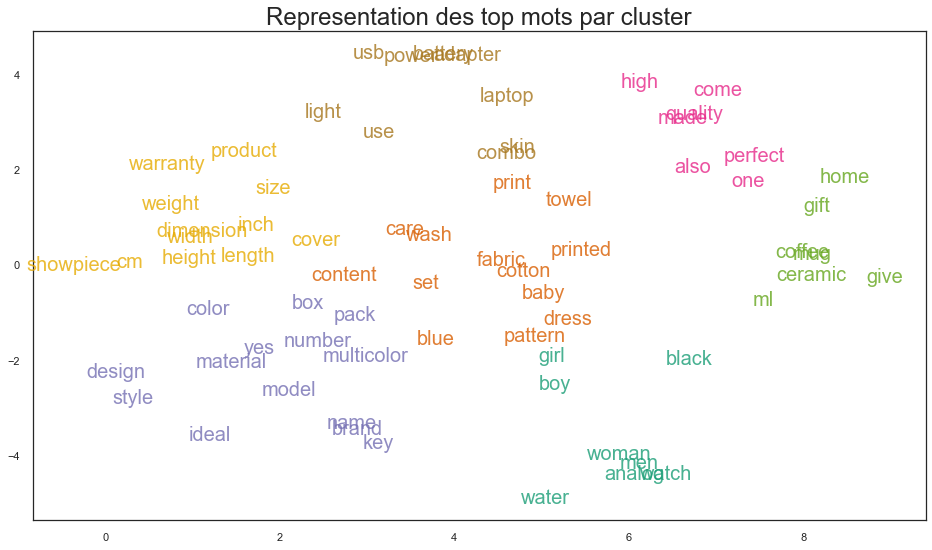

In [ ]:
max_w = 70
ARI4a, X_tsne4a, labels4a = ARI_fct(X[:max_w, :])
print(ARI4a)

_, ax = plt.subplots(figsize=(16, 9))

sns.scatterplot(x=X_tsne4a[:, 0], y=X_tsne4a[:, 1],
                hue=labels4a, palette='Dark2', s=1, ax=ax, alpha=0.2, legend=None)

colors = sns.color_palette('Dark2', n_colors=len(labels)).as_hex()
words = list(w2v_model.wv.index_to_key)[:max_w]
i = 0

for word, label in zip(words, labels4a):
    plt.annotate(word, color=colors[label], alpha=0.8, size=20,
                 ha='center', va='center',
                 xy=(X_tsne4a[i, 0], X_tsne4a[i, 1]))
    i += 1

plt.grid(False)
plt.title('Representation des top mots par cluster', fontsize=24)
to_png()


## Création de la matrice d'embedding

In [ ]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (3940, 300)


## Création du modèle d'embedding

In [ ]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           1182000   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,182,000
Trainable params: 1,182,000
Non-trainable params: 0
_________________________________________________________________


## Exécution du modèle

In [ ]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

(1027, 300)

In [ ]:
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.4226 time :  19.0


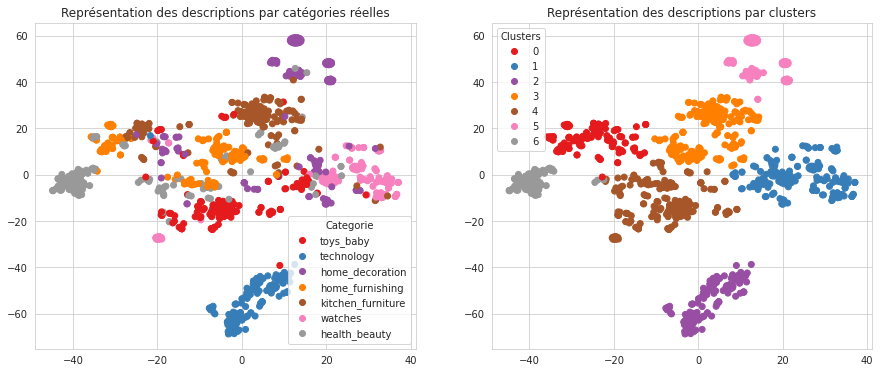

ARI :  0.4226


In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

---

## Création de feature `sentence_dl` pour deep learning

Les modèles de deep learning comme [BERT](https://arxiv.org/abs/1810.04805) et [USE](https://arxiv.org/abs/1803.11175) traitent les mots dans le contexte de leurs phrases

- BERT : Bidirectional Encoder Representations from Transformers
- USE : Universal Sentence Encoder

Avec BERT et USE, il ne faut pas trop traiter les textes, sinon, vous perdez le contexte (racine, lemmatisation) ou modifier purement et simplement les textes (suppression des mots vides).

Les descriptions des produits semblent déjà traités, donc on essaie d'eviter de supprimer les stopwords et lemmatization.


# BERT

In [ ]:
!pip install pip install sacremoses transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 880 kB 14.0 MB/s 
     |████████████████████████████████| 4.4 MB 63.3 MB/s 
     |████████████████████████████████| 6.6 MB 57.2 MB/s 
     |████████████████████████████████| 596 kB 64.8 MB/s 
     |████████████████████████████████| 101 kB 15.7 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=285ceb824c1f46762a80b5dcd5656e9c204133144c79fce0f51324373a37dfb4
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [ ]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.8.2
2.8.2
Num GPUs Available:  0
True


## Fonctions communes

In [ ]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

## BERT HuggingFace

### 'bert-base-uncased'

In [ ]:
data_DL= data_T0.copy()
data_DL['sentence_dl'] = data_T0['description'].apply(lambda x : transform_dl_fct(x))
data_DL['product_category_general']  = data_DL['product_category_tree'].str.split('>>').str[0]
data_DL['product_category_general']  = data_DL['product_category_general'].apply(lambda x : transform_bow_lem_fct(x))
data_DL['product_category_final'] = np.where((data_DL['product_category_general'].str.contains("luggage|watch")==True),
                                    'watches',
                           np.where((data_DL['product_category_general'].str.contains("health|beauty|perfum")==True),
                                    'health_beauty',
                           np.where((data_DL['product_category_general'].str.contains("toy|baby|diaper")==True),
                                     'toys_baby',
                           np.where((data_DL['product_category_general'].str.contains("book|cd|dvd")==True),
                                     'books_cds_media',
                           np.where((data_DL['product_category_general'].str.contains("grocer|food|drink")==True), 
                                     'groceries_food_drink',
                           np.where((data_DL['product_category_general'].str.contains("phon|compu|tablet|electro|consol|usb|lapt")==True), 
                                     'technology',
                           np.where((data_DL['product_category_general'].str.contains("furni|garden|bath|house|applianc|bed|blank")==True), 
                                                                                          'home_furnishing',
                           np.where((data_DL['product_category_general'].str.contains("kitch")==True), 
                                                                                          'kitchen_furniture',
                           np.where((data_DL['product_category_general'].str.contains("flow|gift|stuff")==True),
                                     'flowers_gifts',
                           np.where((data_DL['product_category_general'].str.contains("decor")==True),
                                     'home_decoration',

                                     'other'))))))))))
l_cat = list(set(data_DL['product_category_final']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(data_DL.iloc[i]['product_category_final'])) for i in range(len(data_DL))]

catégories :  ['watches', 'health_beauty', 'kitchen_furniture', 'technology', 'home_furnishing', 'home_decoration', 'toys_baby']


In [ ]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = data_DL['sentence_dl'].to_list()

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

In [ ]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

temps traitement :  280.0


In [ ]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.3243 time :  16.0


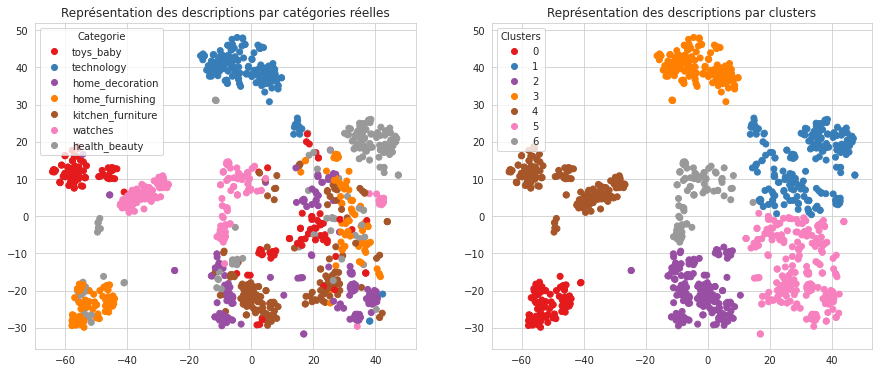

ARI :  0.3243


In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## BERT hub Tensorflow

In [ ]:
pip install tensorflow-text

In [ ]:
import tensorflow_hub as hub

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [ ]:
sentences = data_DL['sentence_dl'].to_list()

In [ ]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

temps traitement :  183.0


In [ ]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.3145 time :  10.0


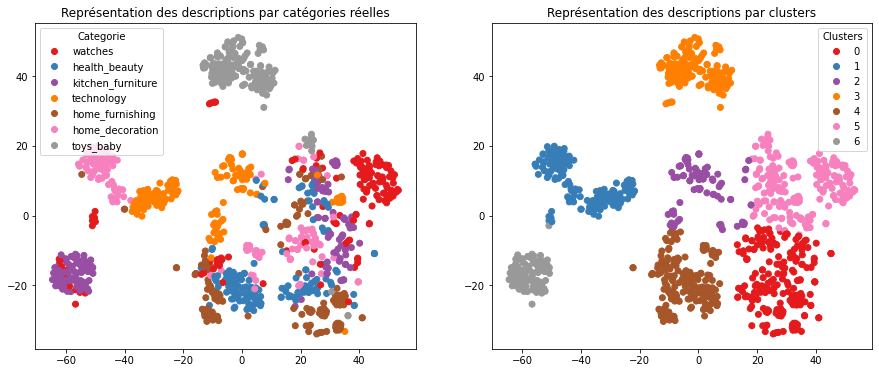

ARI :  0.3145


In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# USE - Universal Sentence Encoder

In [ ]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [ ]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range((len(sentences)//batch_size)) :
        idx = (step*batch_size)
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [ ]:
batch_size = 10
sentences = data_DL['sentence_dl'].to_list()

In [ ]:
features_USE = feature_USE_fct(sentences, batch_size)

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.4189 time :  14.0


In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# **PARTIE 2 : IMAGE**

## 2.1 Import des images

In [ ]:
## Reading training.csv file using pandas
train=data_T.copy()

In [ ]:
## Now we are going to read images 
from tqdm import tqdm  
import os
path=r'/content/drive/MyDrive/P6_DS/Dataset+projet+prétraitement+textes+images.zip (Unzipped Files)/Flipkart/Images' ## location of extracted images
train_images=[]                   ## creating empty list to save images 
def create_train():               ## Defining a function to create training data over images.
  for img in tqdm(train['image']):       ## Iterating over all the image names in train['image'] to read images
    final_path=os.path.join(path,img)    ## Joining path with images to get full path of images 
    train_img=cv2.imread(final_path)     ## reading images using cv2
    img_arr=cv2.resize(train_img,(256,256)) ## We will resize our images to be a (256,256) images.
    train_images.append(img_arr)       ## Saving resized image in train_images list. This proces repeated untill we reach last image name.
create_train()   ## Now calling our create function to get list
print(len(train_images)) ## Printing length of train_images to see number of images in our dataset

100%|██████████| 1050/1050 [00:55<00:00, 18.77it/s]

1050


# 3. Extraire les features des images avec SIFT (Scale-Invariant Feature Transform)

SIFT est très lent si on : 
 - ne réduit pas la taille des images (resize)
 - ne prétraite pas les images ( BGR to GRAY , blur, equalizerHist)

## 3.1 Prétraitement des Images

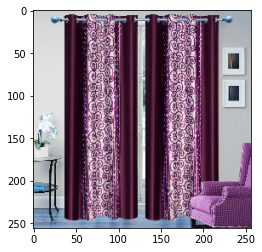

In [ ]:
plt.imshow(train_images[0])

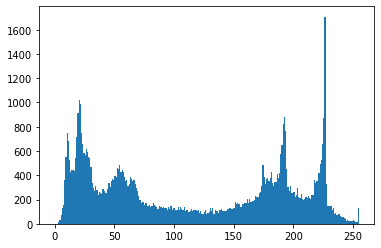

In [ ]:
img = train_images[0]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
n, bins, patches = plt.hist(gray.flatten(), bins=range(256))
plt.show()

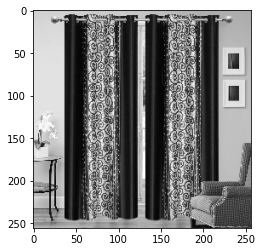

In [ ]:
plt.imshow(gray, cmap = plt.cm.gray)

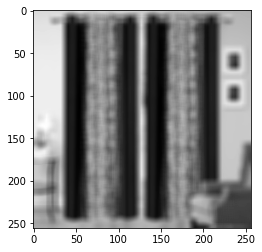

In [ ]:
blur = cv2.GaussianBlur(gray, (9, 9), sigmaX=5, sigmaY=5)
plt.imshow(blur,cmap = plt.cm.gray)

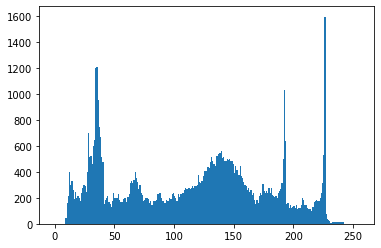

In [ ]:
n, bins, patches = plt.hist(blur.flatten(), bins=range(256))
plt.show()

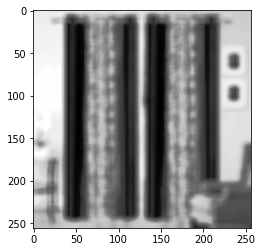

In [ ]:
eqH = cv2.equalizeHist(blur)
plt.imshow(eqH,plt.cm.gray)

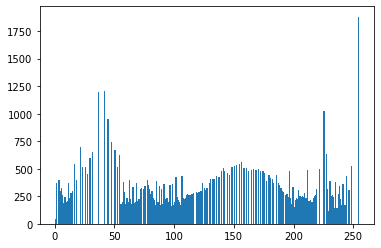

In [ ]:
n, bins, patches = plt.hist(eqH.flatten(), bins=range(256))
plt.show()

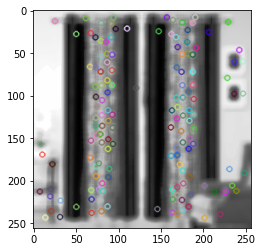

Descripteurs :  (162, 128)

[[  0.   1.  50. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [105.  62.  13. ...   1.  18.  60.]
 ...
 [  2.  18. 117. ...   0.   0.   0.]
 [  4.  17. 108. ...   0.   1.   0.]
 [  0.   0.   0. ...   2.   1.   4.]]


In [ ]:
sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(eqH, None)
teste = cv2.drawKeypoints(eqH, kp, eqH)
plt.imshow(teste)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

### 3.2 Créations des descripteurs de chaque image

- Pour chaque image passage en gris et equalisation
- création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
- création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs


In [ ]:
import time
sift_keypoints = []
temps1 = time.time()
sift = cv2.SIFT_create(
    500
)  # The number of best features (ranked by score) to retain.

for i in range(len(train_images)):
    gray = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2GRAY)  # read and convert to grey
    blur = cv2.GaussianBlur(gray, (5, 5), 2)
    equa = cv2.equalizeHist(blur)  # equalize the histogram
    kp, des = sift.detectAndCompute(equa, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints, dtype=object)
sift_keypoints_all = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1 = time.time() - temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")


Nombre de descripteurs :  (267045, 128)
temps de traitement SIFT descriptor :            36.67 secondes


In [ ]:
temps1 = time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)), 0))
print("Nombre de clusters estimés : ", k)
print("Création de", k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(
    n_clusters=k, init_size=3 * k, random_state=0, batch_size=4096
)
kmeans.fit(sift_keypoints_all)

duration1 = time.time() - temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  517
Création de 517 clusters de descripteurs ...
temps de traitement kmeans :            20.85 secondes



## 3.3 Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

In [ ]:
# Creation of histograms (features)
temps1 = time.time()

# Créations du bag of visual words
# des : listes des descripteur par image
def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(
        des
    )  # numéro de clusters pour la liste des descripteur que j'ai donné
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des = len(des)
    if nb_des == 0:
        print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += (
            1.0 / nb_des
        )  # pour chaque descripteur je fais un +1 au niveau de l'histogramme
        # On pondère par le nbr de descripteurs --> les imgs n'ont pas le m^ nbr de descripteurs
    return hist


# Creation of a matrix of histograms
hist_vectors = []

for i, image_desc in enumerate(sift_keypoints_by_img):
    hist = build_histogram(kmeans, image_desc, i)  # calculates the histogram
    hist_vectors.append(hist)  # histogram is the feature vector

im_features = np.asarray(hist_vectors)  # Convert the input to an array

duration1 = time.time() - temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

temps de création histogrammes :             8.20 secondes


In [ ]:
im_features.shape

(1050, 517)

In [ ]:
len(hist_vectors[1])

517

In [ ]:
np.sqrt(sift_keypoints_all.shape)

array([516.76396933,  11.3137085 ])

<BarContainer object of 517 artists>

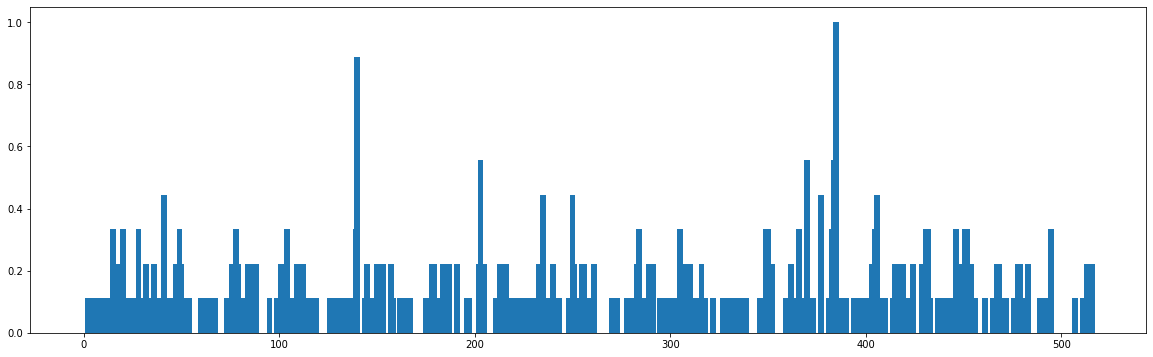

In [ ]:
plt.figure(figsize=(20, 6))
hist = hist_vectors[1]
plt.bar(
    range(len(hist_vectors[1])), ((hist - min(hist)) / (max(hist) - min(hist))), width=3
)


## 3.4 Réductions de dimension

### Réduction de dimension PCA
* Encore une fois, pour avoir une variance acceptable, il faut regarder plusieus dizaines voir centaines de composantes principales. La représentation des 2D (2 composantes principales) n'a donc aucun intérêt). On va donc aller du côté du t-SNE. La réduction PCA permet tout de même de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (choisis ici à 95%)

* La PCA à donc l'avantage de réduire le temps de traitement pour le t-sne et une meilleur séparation des données.

In [ ]:
pca_i = decomposition.PCA(svd_solver='full')
feat_pca_i = pca_i.fit(im_features)


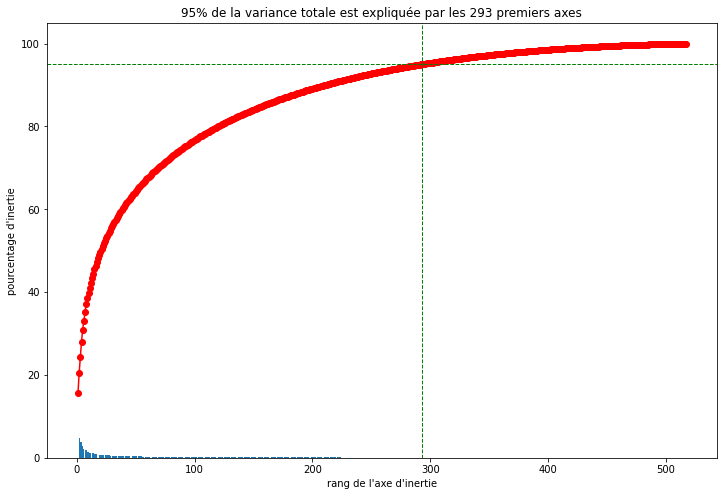

In [ ]:

# Explained variance
varexpl = feat_pca_i.explained_variance_ratio_*100

# Plot of cumulated variance
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)

cumSumVar = varexpl.cumsum()
plt.plot(np.arange(len(varexpl))+1, cumSumVar,c="red",marker='o')
plt.axhline(y=95, linestyle="--", 
            color="green",
            linewidth=1)

limit = 95
valid_idx = np.where(cumSumVar >= limit)[0]
min_plans = valid_idx[cumSumVar[valid_idx].argmin()]+1
plt.axvline(x=min_plans, linestyle="--", 
            color="green",
            linewidth=1)
plt.xlabel("rang de l'axe d'inertie")
#plt.xticks(np.arange(len(varexpl))+1)
plt.ylabel("pourcentage d'inertie")
plt.title("{}% de la variance totale est expliquée"\
          " par les {} premiers axes".format(limit,
                                            min_plans))
plt.show(block=False)

In [ ]:
features_pca = feat_pca_i.transform(im_features)

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_pca[:,:min_plans-1])

ARI :  0.0375 time :  33.0


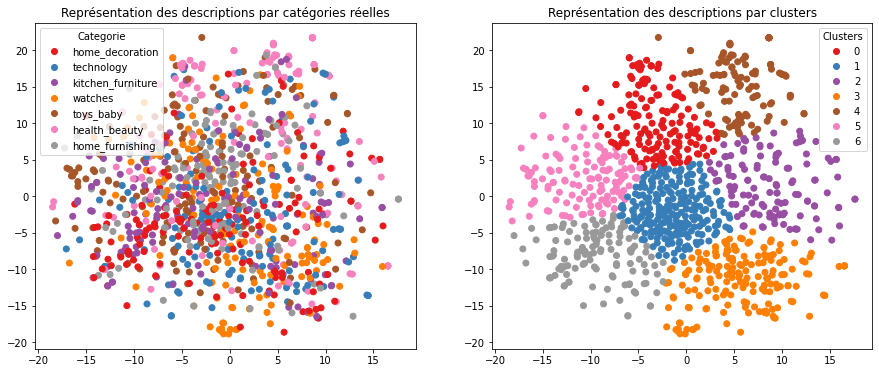

ARI :  0.0375


In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

Les résultats sont très médiocres

# 4. Extraire les features des images avec ORB (Oriented FAST and Rotated BRIEF)

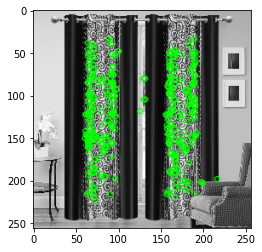

(<matplotlib.image.AxesImage at 0x7fce1229c090>, None)

In [ ]:
import cv2 as cv
#plt.imshow(train_images[0])
img = train_images[0]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 2)
equa = cv2.equalizeHist(blur)  # equalize the histogram
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(equa,None)
# compute the descriptors with ORB
kp, des = orb.compute(equa, kp)
#kp, des = orb.detectAndCompute(img, None)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(equa, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

In [ ]:
from sklearn import metrics
import scipy
from scipy.spatial.distance import cdist
import random
import math
import sys
import shutil
from datetime import datetime


totalImages = len(train_images)
orb_keypoints = []

allImages = train_images


for i in range(totalImages):

  gray = cv2.cvtColor(allImages[i], cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray, (5, 5), 2)
  equa = cv2.equalizeHist(blur)  # equalize the histogram
  orb = cv2.ORB_create()
  kp, des = orb.detectAndCompute(equa, None)
  if des is None:
      print(f'no descriptors found for image_num {i}')
      des = [np.zeros((128,))]
  orb_keypoints.append(des)

orb_keypoints_by_img = np.asarray(orb_keypoints, dtype=object)
orb_keypoints_all = np.concatenate(orb_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", orb_keypoints_all.shape)

duration1 = time.time()-temps1
print("temps de traitement ORB descriptor : ",
      "%15.2f" % duration1, "secondes")





Nombre de descripteurs :  (379950, 32)
temps de traitement ORB descriptor :          1304.35 secondes


In [ ]:
temps1 = time.time()

k_orb = int(round(np.sqrt(len(orb_keypoints_all)), 0))
print("Nombre de clusters estimés : ", k_orb)
print("Création de", k_orb, "clusters de descripteurs ...")

# Clustering
kmeans_orb = cluster.MiniBatchKMeans(
    n_clusters=k, init_size=3 * k, random_state=0, batch_size=4096
).fit(orb_keypoints_all)

duration1 = time.time() - temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  616
Création de 616 clusters de descripteurs ...
temps de traitement kmeans :            24.20 secondes


In [ ]:
# Creation of histograms (features)
temps1 = time.time()

# Créations du bag of visual words
# des : listes des descripteur par image
def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des = len(des)
    if nb_des == 0:
        print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist

# Creation of a matrix of histograms
hist_vectors = []

for i, image_desc in enumerate(orb_keypoints_by_img):
    if i % 100 == 0:
        print(i)
    hist = build_histogram(kmeans, image_desc, i)  # calculates the histogram
    hist_vectors.append(hist)  # histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1 = time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :            10.21 secondes


## 4.4 Réductions de dimension


### Réduction de dimension PCA




In [ ]:
pca_i = decomposition.PCA(svd_solver='full')
feat_pca_i = pca_i.fit(im_features)


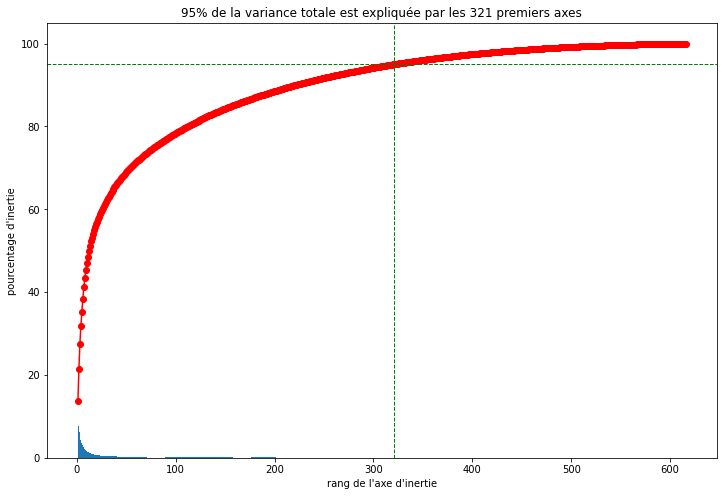

In [ ]:

# Explained variance
varexpl = feat_pca_i.explained_variance_ratio_*100

# Plot of cumulated variance
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)

cumSumVar = varexpl.cumsum()
plt.plot(np.arange(len(varexpl))+1, cumSumVar,c="red",marker='o')
plt.axhline(y=95, linestyle="--", 
            color="green",
            linewidth=1)

limit = 95
valid_idx = np.where(cumSumVar >= limit)[0]
min_plans = valid_idx[cumSumVar[valid_idx].argmin()]+1
plt.axvline(x=min_plans, linestyle="--", 
            color="green",
            linewidth=1)
plt.xlabel("rang de l'axe d'inertie")
#plt.xticks(np.arange(len(varexpl))+1)
plt.ylabel("pourcentage d'inertie")
plt.title("{}% de la variance totale est expliquée"\
          " par les {} premiers axes".format(limit,
                                            min_plans))
plt.show(block=False)

In [ ]:
pca_i = decomposition.PCA(n_components=0.95)
features_pca = pca_i.fit_transform(im_features)
features_pca.shape

(1050, 321)

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_pca)

ValueError: ignored

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

----

# **5. Méthode d'apprentissage profond multimodal:**


Ce problème entre dans la catégorie de la classification multi-label et de la recherche de produits. Parfois, les données textuelles du produit (titre et description du produit) sont utiles pour cette tâche, et parfois les images du produit. Nous avons donc besoin d'un modèle d'apprentissage profond qui prenne en compte à la fois l'image et le texte du produit. C'est pourquoi une méthode d'apprentissage profond multimodal est nécessaire, avec son aide, nous pouvons générer de tels embeddings qui comprennent à la fois le texte du produit et la représentation de l'image, ce qui peut aider dans d'autres tâches en aval pour la classification et la recherche de produits.


## Nous avons pris la référence du document HUSE :

Beaucoup d'idées mises en œuvre ici sont tirées de ce document. J'ai mentionné dans le cahier où j'ai pris la référence de ce document. Vous pouvez aller lire cette section pour mieux comprendre. 

## HUSE: Hierarchical Universal Semantic Embeddings 

(https://arxiv.org/pdf/1911.05978.pdf) Cet article propose une nouvelle méthode, HUSE, pour apprendre la représentation multimodale avec des informations sémantiques. HUSE apprend un espace latent partagé où la distance entre deux incorporations universelles est similaire à la distance entre leurs incorporations de classe correspondantes dans l'espace d'incorporation sémantique. HUSE utilise également un objectif de classification avec une couche de classification partagée pour s'assurer que les incorporations d'images et de textes se trouvent dans les mêmes latents partagés.


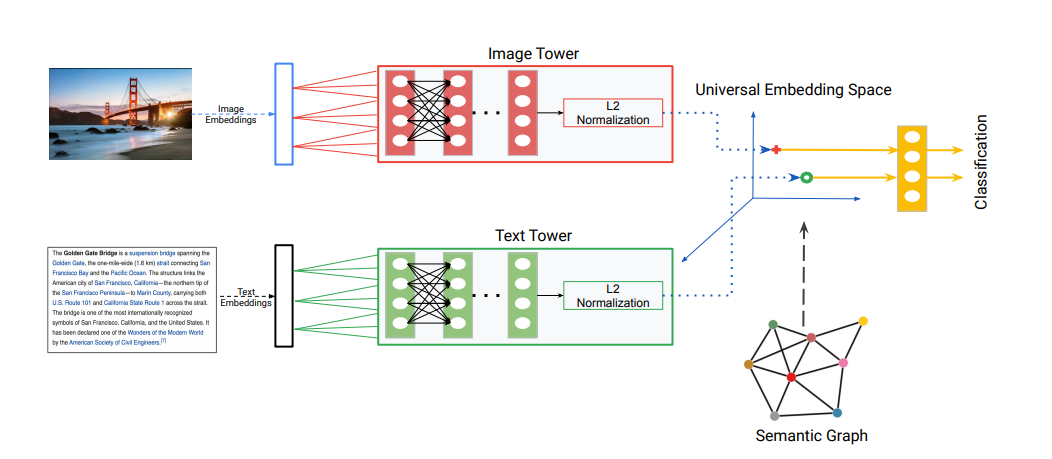



Comme vous pouvez le voir, l'image du modèle HUSE est divisée en 2 parties.

## PARTIE 1 : CRÉATION D'ENTRÉES POUR L'INTÉGRATION DE TEXTES ET D'IMAGES :

HUSE étant un modèle multimodal, il reçoit deux entrées, une image et un texte. L'image est transmise à un modèle d'image VGG16 pré-entraîné qui produit un embedding pour une image individuelle et entraîne un petit modèle qui est utilisé pour obtenir une représentation du texte.

## PARTIE 2 : IMPLÉMENTATION DU MODÈLE POUR LA CRÉATION DES EMBEDDINGS FINAUX :

La sortie du VGG16 est transmise à une tour d'image en parallèle avec la sortie du modèle de texte qui est transmise à la tour de texte. La sortie normalisée L2 des deux tours est ensuite transmise à une couche partagée entièrement connectée. La sortie de la couche entièrement connectée partagée est ensuite utilisée pour calculer différentes pertes.


# **Importation de tous les packages**

In [ ]:
import tensorflow as tf
import keras
from keras import layers, regularizers, optimizers
from keras.layers import Dense, Add, Flatten, Input, Activation, Embedding, Conv1D, GlobalMaxPooling1D, Dropout, Lambda, concatenate
from keras.models import Sequential, Model, load_model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import cv2
import numpy as np
from numpy import load, save
import re
import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


# **5.1 Image Preprocessing**

In [ ]:
## Reading training.csv file using pandas
train=data_T.copy()

In [ ]:
train.head()

Unnamed: 0  Unnamed: 0.1                           uniq_id  \
0           0             0  55b85ea15a1536d46b7190ad6fff8ce7   
1           1             1  7b72c92c2f6c40268628ec5f14c6d590   
2           2             2  64d5d4a258243731dc7bbb1eef49ad74   
3           3             3  d4684dcdc759dd9cdf41504698d737d8   
4           4             4  6325b6870c54cd47be6ebfbffa620ec7   

             crawl_timestamp  \
0  2016-04-30 03:22:56 +0000   
1  2016-04-30 03:22:56 +0000   
2  2016-04-30 03:22:56 +0000   
3  2016-06-20 08:49:52 +0000   
4  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price  ...       overall_rating  \
0        1899.0             899.0  ...  No rating available   
1         600.0             449.0  ...  No rating available   
2           NaN               NaN  ...  No rating available   
3        2699.0            1299.0  ...  No rating available   
4        2599.0             698.0  ...  No rating available   

                   brand                             product_specifications  \
0               Elegance  {"product_specification"=>[{"key"=>"Brand", "v...   
1               Sathiyas  {"product_specification"=>[{"key"=>"Machine Wa...   
2                Eurospa  {"product_specification"=>[{"key"=>"Material",...   
3  SANTOSH ROYAL FASHION  {"product_specification"=>[{"key"=>"Brand", "v...   
4           Jaipur Print  {"product_specification"=>[{"key"=>"Machine Wa...   

  product_category_general                                       sentence_bow  \
0          home furnishing  key features elegance polyester multicolor abs...   
1                baby care  specifications sathiyas cotton bath towel bath...   
2                baby care  key features eurospa cotton terry face towel s...   
3          home furnishing  key features santosh royal fashion cotton prin...   
4          home furnishing  key features jaipur print cotton floral king s...   

                                    sentence_bow_lem  \
0  polyester multicolor abstract eyelet door curt...   
1  bath towel bath towel red yellow blue bath tow...   
2  cotton terry face towel set size small height ...   
3  santosh royal fashion cotton printed king size...   
4  jaipur print cotton floral king sized double b...   

                                         sentence_dl product_category_final  \
0  key features of elegance polyester multicolor ...        home_furnishing   
1  specifications of sathiyas cotton bath towel (...              toys_baby   
2  key features of eurospa cotton terry face towe...              toys_baby   
3  key features of santosh royal fashion cotton p...        home_furnishing   
4  key features of jaipur print cotton floral kin...        home_furnishing   

  length_bow length_dl  
0        156       248  
1         63        84  
2        157       252  
3        114       148  
4        156       228

In [ ]:
## Randomly shuffling data 
train=shuffle(train)
train=train.reset_index(drop=True)

In [ ]:
## Let's look at the shuffled data which will be used for preprocessing data.
train.head()

Unnamed: 0  Unnamed: 0.1                           uniq_id  \
0         654           654  e1d8c5b60f9157f8e21c77cf795952f2   
1         425           425  60a7313ea1e0ee8d845a0a6dec6117cc   
2         110           110  f1ee63a5f0db853e2c1b377778580d39   
3         744           744  73523a8cc9a5c04a010d0307f2f2827a   
4         906           906  9b00cab981ab825158c05c9e54b866d4   

             crawl_timestamp  \
0  2015-12-31 09:19:31 +0000   
1  2016-04-25 19:45:35 +0000   
2  2016-06-10 13:36:16 +0000   
3  2015-12-12 11:46:53 +0000   
4  2016-04-02 19:26:28 +0000   

                                         product_url  \
0  http://www.flipkart.com/intellect-bazaar-cotto...   
1  http://www.flipkart.com/zingalalaa-lp-50-50-lm...   
2  http://www.flipkart.com/twisha-printed-kurti-s...   
3  http://www.flipkart.com/nutcase-sticker-wrap-d...   
4  http://www.flipkart.com/good-night-angel-sleep...   

                                        product_name  \
0  The Intellect Bazaar Cotton Bath Towel, Baby T...   
1  Zingalalaa LP-50 50 lm LED Corded Portable Pro...   
2                      TWISHA Printed Kurti & Salwar   
3  Nutcase Sticker Wrap Design - Gummy Bears 800 ...   
4       good-night-angel-sleep-well-pics Paper Print   

                               product_category_tree               pid  \
0  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEE2GMPQGD56ZT   
1  ["Computers >> Computer Peripherals >> Portabl...  PPJEAJTT86WKA5G9   
2  ["Baby Care >> Infant Wear >> Baby Girls' Clot...  SWDEGU4MDSDGGJHN   
3  ["Kitchen & Dining >> Containers & Bottles >> ...  BOTEANCHFY7TGFKX   
4  ["Home Decor & Festive Needs >> Wall Decor & C...  POSEH7Q4B7F5BUDV   

   retail_price  discounted_price  ...       overall_rating  \
0         999.0             649.0  ...  No rating available   
1        6250.0            3480.0  ...                  2.3   
2         869.0             869.0  ...  No rating available   
3         799.0             399.0  ...  No rating available   
4         599.0             189.0  ...  No rating available   

                  brand                             product_specifications  \
0  The Intellect Bazaar  {"product_specification"=>[{"key"=>"Hooded", "...   
1            Zingalalaa  {"product_specification"=>[{"key"=>"Aspect Rat...   
2                TWISHA  {"product_specification"=>[{"key"=>"Sleeve", "...   
3                   NaN  {"product_specification"=>[{"key"=>"Body Mater...   
4          Mega product  {"product_specification"=>[{"key"=>"Paper Dept...   

  product_category_general                                       sentence_bow  \
0                baby care  buy the intellect bazaar cotton bath towel bab...   
1                 computer  specifications zingalalaa led corded portable ...   
2                baby care  key features twisha printed kurti salwar kurta...   
3           kitchen dining  nutcase sticker wrap design gummy bears 800 bo...   
4  home decor festive need  key features good night angel sleep well pics ...   

                                    sentence_bow_lem  \
0                bazaar cotton bath towel baby towel   
1  corded portable projector multicolor performan...   
2  printed kurti salwar kurta fabric cotton print...   
3  wrap design gummy bear bottle multicolor bring...   
4  good night angel sleep well pic paper print go...   

                                         sentence_dl product_category_final  \
0  buy the intellect bazaar cotton bath towel , b...              toys_baby   
1  specifications of zingalalaa lp 50 50 lm led c...             technology   
2  key features of twisha printed kurti & salwar ...              toys_baby   
3  nutcase sticker wrap design gummy bears 800 ml...      kitchen_furniture   
4  key features of good night angel sleep well pi...        home_decoration   

  length_bow length_dl  
0         18        28  
1        173       241  
2         62        75  
3         60        95  
4        102       141  

[5

In [ ]:
## Now we are going to read images 
from tqdm import tqdm  
path='/content/drive/MyDrive/P6_DS/Dataset+projet+prétraitement+textes+images.zip (Unzipped Files)/Flipkart/Images' ## location of extracted images
train_images=[]                   ## creating empty list to save images 
def create_train():               ## Defining a function to create training data over images.
  for img in tqdm(train['image']):       ## Iterating over all the image names in train['image'] to read images
    final_path=os.path.join(path,img)    ## Joining path with images to get full path of images 
    train_img=cv2.imread(final_path)     ## reading images using cv2
    img_arr=cv2.resize(train_img,(64,64)) ## We will resize our images to be a (64,64) images.
    train_images.append(img_arr)       ## Saving resized image in train_images list. This proces repeated untill we reach last image name.
create_train()   ## Now calling our create function to get list
print(len(train_images)) ## Printing length of train_images to see number of images in our dataset

100%|██████████| 1027/1027 [00:38<00:00, 26.43it/s]

1027


In [ ]:
train.rename(columns={"product_category_final":'classes'},inplace=True)

In [ ]:
## Let's look at the unique classes in training data
train['classes'].unique()

array(['toys_baby', 'technology', 'kitchen_furniture', 'home_decoration',
       'watches', 'home_furnishing', 'health_beauty'], dtype=object)

In [ ]:
## Looking at nummber of classes 
train['classes'].nunique()

7

On a 7 classes

In [ ]:
## Creating numerical labels of classes in our data
train['classes']=train['classes'].astype('category')
train['labels']=train['classes'].cat.codes

In [ ]:
train.head()

Unnamed: 0  Unnamed: 0.1                           uniq_id  \
0         654           654  e1d8c5b60f9157f8e21c77cf795952f2   
1         425           425  60a7313ea1e0ee8d845a0a6dec6117cc   
2         110           110  f1ee63a5f0db853e2c1b377778580d39   
3         744           744  73523a8cc9a5c04a010d0307f2f2827a   
4         906           906  9b00cab981ab825158c05c9e54b866d4   

             crawl_timestamp  \
0  2015-12-31 09:19:31 +0000   
1  2016-04-25 19:45:35 +0000   
2  2016-06-10 13:36:16 +0000   
3  2015-12-12 11:46:53 +0000   
4  2016-04-02 19:26:28 +0000   

                                         product_url  \
0  http://www.flipkart.com/intellect-bazaar-cotto...   
1  http://www.flipkart.com/zingalalaa-lp-50-50-lm...   
2  http://www.flipkart.com/twisha-printed-kurti-s...   
3  http://www.flipkart.com/nutcase-sticker-wrap-d...   
4  http://www.flipkart.com/good-night-angel-sleep...   

                                        product_name  \
0  The Intellect Bazaar Cotton Bath Towel, Baby T...   
1  Zingalalaa LP-50 50 lm LED Corded Portable Pro...   
2                      TWISHA Printed Kurti & Salwar   
3  Nutcase Sticker Wrap Design - Gummy Bears 800 ...   
4       good-night-angel-sleep-well-pics Paper Print   

                               product_category_tree               pid  \
0  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEE2GMPQGD56ZT   
1  ["Computers >> Computer Peripherals >> Portabl...  PPJEAJTT86WKA5G9   
2  ["Baby Care >> Infant Wear >> Baby Girls' Clot...  SWDEGU4MDSDGGJHN   
3  ["Kitchen & Dining >> Containers & Bottles >> ...  BOTEANCHFY7TGFKX   
4  ["Home Decor & Festive Needs >> Wall Decor & C...  POSEH7Q4B7F5BUDV   

   retail_price  discounted_price  ...                 brand  \
0         999.0             649.0  ...  The Intellect Bazaar   
1        6250.0            3480.0  ...            Zingalalaa   
2         869.0             869.0  ...                TWISHA   
3         799.0             399.0  ...                   NaN   
4         599.0             189.0  ...          Mega product   

                              product_specifications product_category_general  \
0  {"product_specification"=>[{"key"=>"Hooded", "...                baby care   
1  {"product_specification"=>[{"key"=>"Aspect Rat...                 computer   
2  {"product_specification"=>[{"key"=>"Sleeve", "...                baby care   
3  {"product_specification"=>[{"key"=>"Body Mater...           kitchen dining   
4  {"product_specification"=>[{"key"=>"Paper Dept...  home decor festive need   

                                        sentence_bow  \
0  buy the intellect bazaar cotton bath towel bab...   
1  specifications zingalalaa led corded portable ...   
2  key features twisha printed kurti salwar kurta...   
3  nutcase sticker wrap design gummy bears 800 bo...   
4  key features good night angel sleep well pics ...   

                                    sentence_bow_lem  \
0                bazaar cotton bath towel baby towel   
1  corded portable projector multicolor performan...   
2  printed kurti salwar kurta fabric cotton print...   
3  wrap design gummy bear bottle multicolor bring...   
4  good night angel sleep well pic paper print go...   

                                         sentence_dl            classes  \
0  buy the intellect bazaar cotton bath towel , b...          toys_baby   
1  specifications of zingalalaa lp 50 50 lm led c...         technology   
2  key features of twisha printed kurti & salwar ...          toys_baby   
3  nutcase sticker wrap design gummy bears 800 ml...  kitchen_furniture   
4  key features of good night angel sleep well pi...    home_decoration   

  length_bow length_dl labels  
0         18        28      5  
1        173       241      4  
2         62        75      5  
3         60        95      3  
4        102       141      1  

[5 rows x 25 columns]

In [ ]:
## Now let's create an array of training labels.
train_labels=train['labels']
train_labels=np.array(train_labels)

Cependant notre training_label n'a pas une forme appropriée (1027,) donc nous allons le remodeler dans une forme appropriée


In [ ]:
## Reshaping training_label to get appropriate format
train_labels=train_labels.reshape(train_labels.shape[0],-1)

In [ ]:
train_labels.shape

(1027, 1)

Nous avons 7 labels. Nous avons donc besoin d'un one hot encoding pour faire la classification.

In [ ]:
train_labels=np.eye(7)[train_labels.reshape(-1)] ## np.eye() will create an Identity Matrix which will use training labels as index to
## get one hot representation. For example if everytime label 0 appears first column will be one else zero. Simillarly for other classes.

In [ ]:
train_labels.shape

(1027, 7)

Maintenant nous avons un  one hot encoding des labels 

In [ ]:
train_labels

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

Nous avons stocké les images dans une liste. Mais pour exécuter des algorithmes sur nos données, nous avons besoin d'un tableau d'une forme comme (None,height,width,channels). Où None n'est rien d'autre que la représentation du nombre d'images, Height et Width sont la taille de l'image (pixels) et channels est utilisé pour représenter une image en niveaux de gris ou RGB. S'il s'agit d'une image en niveaux de gris, le canal sera 1, si l'image est RGB, le canal sera 3. Nous allons donc convertir nos données d'image dans ce format.

In [ ]:
## Converting our train_images data from list to an array
train_images=np.array(train_images)

In [ ]:
train_images.shape

(1027, 64, 64, 3)

*Maintenant*, nous disposons d'un format de données d'image approprié pour exécuter les algorithmes. Dans l'étape suivante, nous allons diviser nos données en deux parties : train et test. 

In [ ]:
training_size = int(train_images.shape[0] * 0.85)

In [ ]:
X_train=train_images[0:training_size,:,:,:]
Y_train=train_labels[0:training_size,:]
X_test=train_images[training_size:,:]
Y_test=train_labels[training_size:,:]

In [ ]:
X_train.shape

(825, 64, 64, 3)

In [ ]:
Y_train.shape

(825, 7)

[0. 0. 0. 0. 1. 0. 0.]
technology
corded portable projector multicolor performance aspect ratio color support milion throw ratio support resolution native pixel pixel maximum pixel pixel keystone correction automatic model brightness signal pal projection distance technology used brilliantcolor supported file format jpeg bmp png wma rmvb mov flv divx avi projection screen size color multicolor covered limited manufacturing defect summary month service repair covered cover external damage dimension weight height width depth connectivity wireless network connectivity audio input output jack macintosh compatibility vga yes hdmi yes memory card supported micro power power source corded audio audio mono speaker speaker output lens zoom lamp led lamp display technology led lamp life hour additional remote control yes mountable yes box projector power cord remote cable user manual


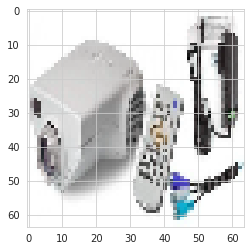

In [ ]:
## Let's look at one image with it's class and label
plt.imshow(train_images[1])
print(train_labels[1])
print(train['classes'].iloc[1])
print(train['sentence_bow_lem'].iloc[1])

Sauvegarde des données d'image prétraitées pour une utilisation ultérieure.

In [ ]:
## Saving Data for future use
#save('/content/drive/My Drive/train.npy',X_train)
#save('/content/drive/My Drive/test.npy',X_test)
#save('/content/drive/My Drive/label_train.npy',Y_train)
#save('/content/drive/My Drive/label_test.npy',Y_test)

Vous pouvez charger vos données en utilisant le code ci-dessous.

In [ ]:
"""X_train=load('/content/drive/My Drive/data ecommerce /train.npy')
X_test=load('/content/drive/My Drive/data ecommerce /test.npy')
Y_train=load('/content/drive/My Drive/data ecommerce /label_train.npy')
Y_test=load('/content/drive/My Drive/data ecommerce /label_test.npy')"""

"X_train=load('/content/drive/My Drive/data ecommerce /train.npy')\nX_test=load('/content/drive/My Drive/data ecommerce /test.npy')\nY_train=load('/content/drive/My Drive/data ecommerce /label_train.npy')\nY_test=load('/content/drive/My Drive/data ecommerce /label_test.npy')"

Normalisation des données en divisant 255. La raison de la division de 255 est que la valeur du pixel va de 0 à 255. Cela nous donnera des valeurs entre 0 et 1.

In [ ]:
X_train=X_train/255 ## Normalizing train data

In [ ]:
X_test=X_test/255   ## Normalizing test data

5


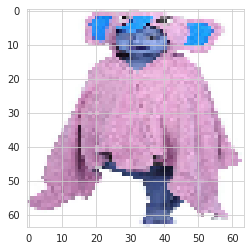

In [ ]:
plt.imshow(X_train[0])
print(np.argmax(Y_train[0]))


# **5.2 Text PreProcessing**

In [ ]:
## Extracting product names from our dataframe
names=np.array(train['sentence_bow_lem'])

In [ ]:
names

array(['bazaar cotton bath towel baby towel',
       'corded portable projector multicolor performance aspect ratio color support milion throw ratio support resolution native pixel pixel maximum pixel pixel keystone correction automatic model brightness signal pal projection distance technology used brilliantcolor supported file format jpeg bmp png wma rmvb mov flv divx avi projection screen size color multicolor covered limited manufacturing defect summary month service repair covered cover external damage dimension weight height width depth connectivity wireless network connectivity audio input output jack macintosh compatibility vga yes hdmi yes memory card supported micro power power source corded audio audio mono speaker speaker output lens zoom lamp led lamp display technology led lamp life hour additional remote control yes mountable yes box projector power cord remote cable user manual',
       'printed kurti salwar kurta fabric cotton printed kurti salwar flamingo polka print 

Nous avons déjà prétraité le texte

 **Comparer les données avant le nettoyage et après le nettoyage**
 
 **Avant le nettoyage :** 
'#" Balenciaga  Track 2 logo-detailed metallic mesh and rubber sneakers   '

 **Après le nettoyage :**  
'balenciaga  track  logodetailed metallic mesh and rubber sneakers'

Vous pouvez voir que nous avons changé les lettres majuscules et supprimé les chiffres, les signes de ponctuation et les espaces supplémentaires en fin de phrase.

In [ ]:
train['sentence_bow_lem'].count()

1027

In [ ]:
# The maximum number of words to be used.
MAX_NB_WORDS = 5000
# Max number of words in each name.
MAX_SEQUENCE_LENGTH = 30
EMBEDDING_DIM = 100

In [ ]:
# Generating Word tokens
tokenizer = Tokenizer( filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(names)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 3941 unique tokens.


Nous avons 3941 tokens uniques que nous utiliserons pour entraîner notre modèle de texte.

In [ ]:
# Let's look at the tokens
word_index

{'mug': 1,
 'color': 2,
 'watch': 3,
 'baby': 4,
 'set': 5,
 'box': 6,
 'cotton': 7,
 'design': 8,
 'girl': 9,
 'inch': 10,
 'model': 11,
 'ceramic': 12,
 'fabric': 13,
 'showpiece': 14,
 'size': 15,
 'made': 16,
 'boy': 17,
 'perfect': 18,
 'gift': 19,
 'men': 20,
 'dimension': 21,
 'usb': 22,
 'skin': 23,
 'ideal': 24,
 'coffee': 25,
 'multicolor': 26,
 'home': 27,
 'content': 28,
 'one': 29,
 'combo': 30,
 'cover': 31,
 'print': 32,
 'water': 33,
 'light': 34,
 'printed': 35,
 'adapter': 36,
 'width': 37,
 'black': 38,
 'also': 39,
 'battery': 40,
 'wash': 41,
 'give': 42,
 'care': 43,
 'power': 44,
 'pattern': 45,
 'blue': 46,
 'height': 47,
 'yes': 48,
 'high': 49,
 'use': 50,
 'style': 51,
 'length': 52,
 'towel': 53,
 'name': 54,
 'dress': 55,
 'come': 56,
 'shape': 57,
 'easy': 58,
 'weight': 59,
 'wall': 60,
 'round': 61,
 'body': 62,
 'make': 63,
 'designed': 64,
 'look': 65,
 'casual': 66,
 'dial': 67,
 'strap': 68,
 'safe': 69,
 'resistant': 70,
 'sleeve': 71,
 'single': 72

In [ ]:
## Finally we are creating our text data for training
X = tokenizer.texts_to_sequences(names) # Here it takes each word from names and replaces it with it's corresponding number from our word_index
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH) # it transforms list of sequences into numpy aray of shape (num_sequence,num_timestep) 
## Where num sequence is number of sentences in names and num_timestep is number of words in each sentence which is 15 in this case.
print('Shape of data tensor:', X.shape)

Shape of data tensor: (1027, 30)


In [ ]:
# You can see here an array where for every example(sentence) we have 15 fetaures(words).
X

array([[   0,    0,    0, ...,   53,    4,   53],
       [ 550, 2767, 1293, ...,  360, 2770,  897],
       [1294,  742,  742, ...,   43,   97,   41],
       ...,
       [   0,    0,  117, ...,    6,   33,  107],
       [   0,    0,    0, ...,  500, 3941,  511],
       [   0,    0,    0, ...,  972,   30,    5]], dtype=int32)

In [ ]:
## Now let's create train and test datasets
X_traintext=X[0:training_size,:]
X_testtext=X[training_size:,:]
print(X_traintext.shape,Y_train.shape)
print(X_testtext.shape,Y_test.shape)

(825, 30) (825, 7)
(202, 30) (202, 7)


Sauvegarde des données textuelles prétraitées pour une utilisation ultérieure.

In [ ]:
#save('/content/drive/My Drive/train_text.npy',X_traintext)
#save('/content/drive/My Drive/test_text.npy',X_testtext)

Nous pouvons recharger les données du texte en utilisant le code ci-dessous



In [ ]:
"""X_traintext=load('/content/drive/My Drive/data ecommerce /train_text.npy')
X_testtext=load('/content/drive/My Drive/data ecommerce /test_text.npy')"""

"X_traintext=load('/content/drive/My Drive/data ecommerce /train_text.npy')\nX_testtext=load('/content/drive/My Drive/data ecommerce /test_text.npy')"

# **5.3 Image Embeddings**




Part1 : Nous allons utiliser le modèle pré-entraîné VGG16 pour obtenir des images intégrées.

In [ ]:
new_model = VGG16(weights='imagenet',include_top=False,input_shape=(64,64,3)) ## Loading VGG16 model with shape(64,64,3), 
## Excluding last layer and using imagenet weights.
model=Sequential()       ## Creating new model where we will load our vgg16 model
for layer in new_model.layers:
  model.add(layer)
for layer in model.layers: ## Setting layers of model to trainable as false
  layer.trainable=False
model.add(Flatten())       ## Adding a Flatten layer at the end to get a vector output

In [ ]:
## Now let's look at the summary of model
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 16, 16, 256)     

Vous pouvez voir la couche Flatten à la fin qui produit un vecteur de 2048 dimensions. Ces 2048 embeddings seront transmis à la tour d'image plus tard. En ce qui concerne le modèle, vous pouvez voir qu'il y a 14,714,688 paramètres au total, mais les paramètres entraînables sont 0 car nous ne voulons pas entraîner le modèle VGG16.

# **5.4 Implementer la Tour d'Images**

Maintenant, nous allons mettre en œuvre la partie 2 : **la Tour d'Images**. 

Ici, nous avons pris la référence de "4.1.3 Training Process" du document pour construire la tour d'images. Nous nous sommes également inspirés de la section "3.2. Structure du réseau", troisième paragraphe : "La tour de texte et la tour d'image peuvent avoir un nombre différent de couches cachées et des couches cachées de tailles différentes. La seule restriction est que la dernière couche des deux tours doit avoir D unités cachées suivies d'une normalisation L2".


In [ ]:
## Creating image_tower model
## As defined in paper we are going to use 5 hidden Dense layer with 512 units each
## A dropout of 0.15 is used between all hidden layers.
## L2 normalization is used 
image_tower=Sequential()
image_tower.add(Dense(512,activation='softmax'))
image_tower.add(Dropout(0.15))
image_tower.add(Dense(512,activation='softmax'))
image_tower.add(Dropout(0.15))
image_tower.add(Dense(512,activation='softmax'))
image_tower.add(Dropout(0.15))
image_tower.add(Dense(512,activation='softmax'))
image_tower.add(Dropout(0.15))
image_tower.add(Dense(512,activation='softmax'))   ## Last layer with D=512 hidden units followed by L2 normalization.
image_tower.add(Lambda(lambda xz:K.l2_normalize(xz,axis=1))) ## Normalizing 

Maintenant nous allons ajouter notre modèle image_tower au modèle d'incorporation d'image

---



In [ ]:
model.add(image_tower)

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 16, 16, 256)     

Comme vous pouvez le voir, il y a 14 714 688 paramètres non entraînables du modèle précédent et 2 099 712 nouveaux paramètres du modèle image_tower qui sont entraînables. La dernière couche 'sequential_2' représente le modèle image_tower.

# **5.5 Text Embeddings**

Partie 1 : intégration de texte. Ici, nous avons décidé de former un petit modèle pour l'incorporation de texte plutôt que d'utiliser un modèle pré-formé. Ce modèle sera entraîné et il transmettra les incorporations de texte à text_tower.

In [ ]:
## Creating textmodel 
textmodel=Sequential()
# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
textmodel.add(Embedding(MAX_NB_WORDS,
                    EMBEDDING_DIM,input_length=X_traintext.shape[1]))
textmodel.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
textmodel.add(Conv1D(256,
                 5,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
textmodel.add(GlobalMaxPooling1D())

# We add a Fully Connected hidden layer:
textmodel.add(Dense(512))
textmodel.add(Dropout(0.2))
textmodel.add(Activation('relu'))

In [ ]:
## Now look at the summary of this model
textmodel.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 30, 100)           500000    
                                                                 
 dropout_217 (Dropout)       (None, 30, 100)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 26, 256)           128256    
                                                                 
 global_max_pooling1d_4 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_41 (Dense)            (None, 512)               131584    
                                                                 
 dropout_218 (Dropout)       (None, 512)               0         
                                                     

Nous avons donc 7 couches dans ce modèle et 759 840 paramètres qui peuvent être entraînés. Et la dernière couche transmettra les incorporations de texte à la tour de texte.

# **5.6 Implementer la Tour de Texte**

Maintenant, nous allons mettre en œuvre la partie 2 : **la Tour de Texte**. 

Ici, nous avons pris la référence de "4.1.3 Training Process" du document pour construire la tour de texte. Nous nous sommes également inspirés de la section "3.2. Structure du réseau", troisième paragraphe : "La tour de texte et la tour d'image peuvent avoir un nombre différent de couches cachées et des couches cachées de tailles différentes. La seule restriction est que la dernière couche des deux tours doit comporter D unités cachées suivies d'une normalisation L2".


In [ ]:
## Creating text_tower model
## As defined in paper we are going to use 2 hidden Dense layer with 512 units each
## A dropout of 0.15 is used between all hidden layers.
## L2 normalization is used
text_tower=Sequential()
text_tower.add(Dense(512,activation='relu'))
text_tower.add(Dropout(0.15))
text_tower.add(Dense(512,activation='relu'))  ## Last layer with D=512 hidden units followed by L2 normalization.
text_tower.add(Lambda(lambda xz:K.l2_normalize(xz,axis=1))) ## L2 normalizaton.

Maintenant, nous allons ajouter le modèle text_tower au modèle d'intégration du texte.

In [ ]:
## Adding text_tower to textmodel
textmodel.add(text_tower)

In [ ]:
## Let's see textmodel now.
textmodel.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 30, 100)           500000    
                                                                 
 dropout_217 (Dropout)       (None, 30, 100)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 26, 256)           128256    
                                                                 
 global_max_pooling1d_4 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_41 (Dense)            (None, 512)               131584    
                                                                 
 dropout_218 (Dropout)       (None, 512)               0         
                                                     

Comme vous pouvez le voir, il y a un total de 1 285 152 paramètres et tous les paramètres sont configurés pour être entraînables. La dernière couche, 'sequential_18', représente le modèle text_tower.

# **5.7 Modèle Final**

Maintenant, nous allons fusionner les deux modèles et ajouter la couche finale pour la classification.

In [ ]:
merged=concatenate([model.output,textmodel.output]) ## Merging both the models
out=Dense(7)(merged) ## Adding a Dense layer to merged layers
out=Activation('softmax')(out) ## Adding activation softmax for classification
final_model=Model([model.input,textmodel.input],out) ## Final model which we will use for classification

In [ ]:
## Let's have a look at the final model.
final_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 block1_conv1 (Conv2D)          (None, 64, 64, 64)   1792        ['input_7[0][0]']                
                                                                                                  
 block1_conv2 (Conv2D)          (None, 64, 64, 64)   36928       ['block1_conv1[1][0]']           
                                                                                                  
 block1_pool (MaxPooling2D)     (None, 32, 32, 64)   0           ['block1_conv2[1][0]']           
                                                                                            

Regardez la couche 'sequential_17', c'est la sortie de l'image_tower, de même que 'sequential_19' est la sortie du text_tower. Ces couches sont fusionnées (concaténées) dans la couche 'concatenate_4'.

 Dans le modèle final, nous avons un total de 18.106.727 paramètres dont seulement 3.392.039 sont entraînables. 14,714,688 paramètres sont non entraînables et proviennent du modèle VGG16. Ce modèle sera utilisé pour la classification.

# **5.8 Class Level Similarity**


Comme défini dans "4.1.3 Training Process", nous utiliserons l'optimisation RMSprop avec learning_rate=1.6192e-5. Nous utiliserons "categorical_crossentropy" comme indiqué dans "3.4.1 Class Level Similarity".

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
final_model.compile(optimizer=optimizers.RMSprop(learning_rate=1.6192e-5),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

Nous définissons un callback qui arrêtera l'entraînement après avoir atteint une précision de 98% ou plus sur l'ensemble du validation set.

In [ ]:
import datetime

In [ ]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    if(logs.get('val_accuracy')>=0.98):
      
      tensor_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
      print("\n Reached accuracy of 98% hence stopping training")
      self.model.stop_training=True
    else:
      tensor_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    return tensor_callback
callbacks=myCallback()

In [ ]:
X_train.shape

(825, 64, 64, 3)

Enfin, l'entraînement de notre modèle

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensor_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = final_model.fit([X_train,X_traintext],Y_train,epochs=350,validation_split=0.05,callbacks=[tensor_callback])

Epoch 1/350
25/25 [==============================] - 44s 2s/step - loss: 1.9441 - accuracy: 0.1481 - val_loss: 1.9379 - val_accuracy: 0.2619
Epoch 2/350
25/25 [==============================] - 44s 2s/step - loss: 1.9426 - accuracy: 0.1648 - val_loss: 1.9388 - val_accuracy: 0.1429
Epoch 3/350
25/25 [==============================] - 43s 2s/step - loss: 1.9391 - accuracy: 0.1954 - val_loss: 1.9385 - val_accuracy: 0.1429
Epoch 4/350
25/25 [==============================] - 44s 2s/step - loss: 1.9368 - accuracy: 0.2222 - val_loss: 1.9380 - val_accuracy: 0.1429
Epoch 5/350
25/25 [==============================] - 44s 2s/step - loss: 1.9346 - accuracy: 0.2056 - val_loss: 1.9372 - val_accuracy: 0.1667
Epoch 6/350
25/25 [==============================] - 44s 2s/step - loss: 1.9301 - accuracy: 0.2554 - val_loss: 1.9340 - val_accuracy: 0.2143
Epoch 7/350
25/25 [==============================] - 45s 2s/step - loss: 1.9281 - accuracy: 0.2682 - val_loss: 1.9320 - val_accuracy: 0.2143
Epoch 8/350
2

Évaluation du modèle sur l'ensemble de test

In [ ]:
final_model.evaluate([X_test,X_testtext],Y_test)

7/7 [==============================] - 9s 1s/step - loss: 0.6064 - accuracy: 0.8762


[0.6063847541809082, 0.8762376308441162]

7/7 - 9s - loss: 0.6064 - accuracy: 0.8762 - 9s/epoch - 1s/step


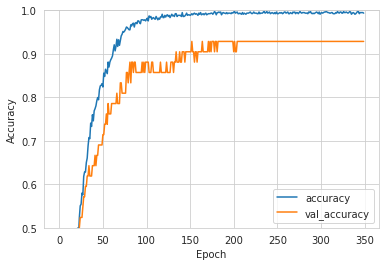

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = final_model.evaluate([X_test,X_testtext],Y_test, verbose=2)


In [ ]:
%tensorboard --logdir logs/fit

<IPython.core.display.Javascript object>

In [ ]:
final_model.save('/content/drive/My Drive/cross_model.h5')

In [ ]:
final_model.save_weights('/content/drive/My Drive/cross_model_weights.h5')

## 5.9 Predictions sur le Test Set

In [ ]:
## Predicting on X_test and X_testtext datasets
pred = final_model.predict([X_test,X_testtext])

In [ ]:
train['classes']

0               toys_baby
1              technology
2               toys_baby
3       kitchen_furniture
4         home_decoration
              ...        
1022              watches
1023    kitchen_furniture
1024    kitchen_furniture
1025           technology
1026        health_beauty
Name: classes, Length: 1027, dtype: category
Categories (7, object): ['health_beauty', 'home_decoration', 'home_furnishing', 'kitchen_furniture',
                         'technology', 'toys_baby', 'watches']

[0. 0. 1. 0. 0. 0. 0.]
home_furnishing
sofa cover multicolour box model shade multicolour color multicolor sofa pattern checkered velvet suitable living room dimension height weight


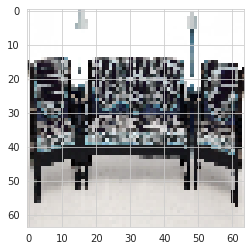

In [ ]:
image = 23
plt.imshow(X_test[image])
print(train_labels[825 + image])
print(train['classes'].iloc[825 + image])
print(train['sentence_bow_lem'].iloc[825+ image])

Product Name :  Dreamshomes Velvet Sofa Cover
Description :  sofa cover multicolour box model shade multicolour color multicolor sofa pattern checkered velvet suitable living room dimension height weight
Y_True :  2 home_furnishing
Prediction  2 home_furnishing

Good prediction !!



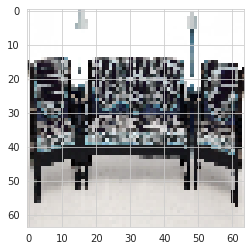

In [ ]:
image = 23
plt.imshow(X_test[image])
print("Product Name : " ,train['product_name'].iloc[X_train.shape[0]+ image])
print("Description : " ,train['sentence_bow_lem'].iloc[X_train.shape[0]+ image])
print("Y_True : ",np.argmax(Y_test[image]), train["classes"][train["labels"] == np.argmax(Y_test[image])].unique()[0])
print("Prediction ",np.argmax(pred[image]),train["classes"][train["labels"] == np.argmax(pred[image])].unique()[0])
if np.argmax(Y_test[image]) == np.argmax(pred[image]):
  print("\nGood prediction !!\n")
else:
  print("\nWRONG !!!\n")

# 5.10 Evaluation

**Avec ces différents scores, nous essayons d'évaluer la qualité de notre modèle de prédiction. "precision" nous montre à quelle fréquence la prédiction est réellement correcte. "recall" nous donne le taux de bonne prédiction. "f1" est la moyenne pondérée entre la précision et le dernier indicateur est l' "accuracy" globale.**

Confusion matrix, without normalization
[[29  3  0  1  0  0  0]
 [ 0 28  0  0  0  1  0]
 [ 0  0 24  0  0  8  0]
 [ 1  2  0 34  0  0  0]
 [ 0  1  1  0 15  0  1]
 [ 1  2  0  1  1 24  0]
 [ 1  0  0  0  0  0 23]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


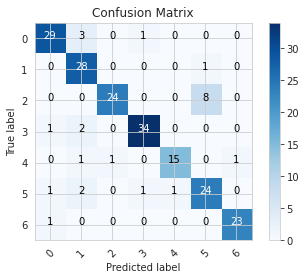

In [ ]:
import sklearn.metrics as skmet
y_pred=np.argmax(pred, axis=1)
y_true=np.argmax(Y_test, axis=1)
cm = skmet.confusion_matrix(y_true=y_true, y_pred=y_pred)
def plot_confusion_matrix(cm, classes,normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
 """ “””
 This function prints and plots the confusion matrix.
 Normalization can be applied by setting `normalize=True`.
 “””"""
 plt.imshow(cm, interpolation='nearest', cmap=cmap)
 plt.title(title)
 plt.colorbar()
 tick_marks = np.arange(len(classes))
 plt.xticks(tick_marks, classes, rotation=45)
 plt.yticks(tick_marks, classes)
print('Confusion matrix, without normalization')
print(cm)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
 plt.text(j, i, cm[i, j],
 horizontalalignment="center",
 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
cm_plot_labels = ['0','1','2','3','4','5','6']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
good_pred = (cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6])
false_pred = (cm.sum()-(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]))

In [ ]:
print("\033[1m The result is telling us that we have: ",good_pred,"correct predictions.")
print("\033[1m The result is telling us that we have: ",false_pred,"incorrect predictions.")
print("\033[1m We have total accuracy of: ",round(good_pred / cm.sum() *100,2), "%")

 The result is telling us that we have:  177 correct predictions.
 The result is telling us that we have:  25 incorrect predictions.
 We have total accuracy of:  87.62 %


In [ ]:
print(skmet.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.78      0.97      0.86        29
           2       0.96      0.75      0.84        32
           3       0.94      0.92      0.93        37
           4       0.94      0.83      0.88        18
           5       0.73      0.83      0.77        29
           6       0.96      0.96      0.96        24

    accuracy                           0.88       202
   macro avg       0.89      0.88      0.88       202
weighted avg       0.89      0.88      0.88       202



In [ ]:
ARI = np.round(metrics.adjusted_rand_score(y_true, y_pred),4)
print(f"Score ARI : {ARI}")

Score ARI : 0.7466


# 6. Conclusion

**Traitement Texte :**

 **Avant le nettoyage :** 
'#" Balenciaga  Track 2 logo-detailed metallic mesh and rubber sneakers rs30  '

 **Après le nettoyage :**  
'balenciaga  track  logodetailed metallic mesh and rubber sneakers'

---

Il est possible de créer un moteur de classification avec seulement une image et/ou sa description :

**Score ARI :**

**TEXTE :**
- CountVectorizer Unigram sans ACP : 0.44
- CountVectorizer Unigram avec ACP : 0.45
- TF-IDF Unigram sans ACP : 0.46
- TF-IDF Unigram avec ACP : 0.55

**Deep Learning :**
- BERT : 0.3
- USE : 0.41

**IMAGE :**
- SIFT : 0.02
- ORB : 0.019

**Transfer Learning :**
- Multi modal Image + Text: 0.746

Le Multi modèle est le plus performant avec seulement 1000 images d'entraînements.